# Proyecto: Hábitos Estudiantiles y Desempeño (CRISP-DM)

-Business Understanding → Data Understanding → Data Preparation
-  **Integrantes:** [Alvaro Maguiña - Moises Morales - Erick Mendoza]  

## Fase 1. Business Understanding

### 🎯 1. Objective

- Construir un modelo que prediga si un estudiante tendrá **DESEMPEÑO SATISFACTORIO** (**PASS = 1**) o **NO SATISFACTORIO** (**FAIL = 0**) en la asignatura de Portugués, usando principalmente sus **hábitos de estudio** (tiempo de estudio, ausencias, apoyo extra, actividades, etc.) y otras características personales, familiares y escolares disponibles en la base de datos de estudiantes de secundaria.

### ✅ Success criteria (SC)

- **Técnico:**
  - F1-score ≥ 0.80 para la clase *FAIL* en el conjunto de validación.  
  - Accuracy general ≥ 0.80 como métrica secundaria.
- **De negocio / Académico:**
  - Contribuir al **monitoreo temprano de estudiantes en riesgo de bajo desempeño** para que tutores y docentes puedan priorizar acciones de apoyo (tutorías, consejería, refuerzo académico).  
  - Generar **evidencia cuantitativa** sobre qué hábitos estudiantiles y factores escolares se asocian a mejor rendimiento, apoyando decisiones de la dirección y del área pedagógica.

## Fase 2. Data Understanding

### 📥 2. Data collection 

En esta fase se realiza la carga y exploración inicial de los datos del proyecto **Hábitos Estudiantiles y Desempeño Académico**. La fuente principal es el archivo `student-por.csv`, que contiene información sobre hábitos de estudio, características familiares y rendimiento académico de estudiantes de secundaria.
A continuación se carga el dataset y se obtiene un resumen general.

In [3]:
import pandas as pd
from IPython.display import display

# Archivo(s) de datos del proyecto "Hábitos Estudiantiles y Desempeño"
archivos = ["student-por.csv"]   # agrega más archivos si los necesitas

# Leer y concatenar usando ; como separador
df = pd.concat(
    [pd.read_csv(f, sep=";", encoding="utf-8") for f in archivos],
    ignore_index=True
)

# Tamaño del dataset y vista rápida
print("Shape (filas, columnas):", df.shape)
display(df.head())
print("\nColumnas:\n", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)


Shape (filas, columnas): (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13



Columnas:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Dtypes:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64

### 📊 3. Descriptive analysis

#### 3.1 Análisis descriptivo

En esta sección se obtiene un **resumen estadístico** de todas las variables del dataset `student-por.csv`, incluyendo tanto variables numéricas (edad, notas G1, G2, G3, etc.) como categóricas (sexo, escuela, apoyo, etc.).

In [6]:
# Resumen estadístico de todas las variables (incluye categóricas y numéricas)
desc = df.describe(include="all").T   # .T para ver variables en filas
display(desc)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Separar datos numéricos y categóricos
numeric_data = df.select_dtypes(include=[np.number])
categoric_data = df.select_dtypes(exclude=[np.number])

print(
    "There are {} numeric and {} categorical columns in student data"
    .format(numeric_data.shape[1], categoric_data.shape[1])
)

There are 16 numeric and 17 categorical columns in student data


In [11]:
# Resumen estadístico de variables numéricas
display(numeric_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [10]:
# Resumen estadístico de variables categóricas
display(categoric_data.describe(include="all").T)

,count,unique,top,freq
school,649,2,GP,423
sex,649,2,F,383
address,649,2,U,452
famsize,649,2,GT3,457
Pstatus,649,2,T,569
Mjob,649,5,other,258
Fjob,649,5,other,367
reason,649,4,course,285
guardian,649,3,mother,455
schoolsup,649,2,no,581


In [12]:
# Crear variable objetivo: PASS (1) / FAIL (0) a partir de G3
df["target_pass"] = (df["G3"] >= 10).astype(int)   # 1 = PASS, 0 = FAIL

# Si quieres verla como texto:
df["target_pass_str"] = df["target_pass"].map({1: "PASS", 0: "FAIL"})

In [13]:
# Conteo de valores únicos en algunas variables categóricas
for col in ["school", "sex", "address", "schoolsup", "famsup",
            "paid", "activities", "internet", "romantic"]:
    print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo (como 0/1)
print("\nTarget_pass (0=FAIL, 1=PASS):")
print(df["target_pass"].value_counts())

# (Opcional) Conteo de la variable objetivo en texto
print("\nTarget_pass_str:")
print(df["target_pass_str"].value_counts())



school:
 school
GP    423
MS    226
Name: count, dtype: int64

sex:
 sex
F    383
M    266
Name: count, dtype: int64

address:
 address
U    452
R    197
Name: count, dtype: int64

schoolsup:
 schoolsup
no     581
yes     68
Name: count, dtype: int64

famsup:
 famsup
yes    398
no     251
Name: count, dtype: int64

paid:
 paid
no     610
yes     39
Name: count, dtype: int64

activities:
 activities
no     334
yes    315
Name: count, dtype: int64

internet:
 internet
yes    498
no     151
Name: count, dtype: int64

romantic:
 romantic
no     410
yes    239
Name: count, dtype: int64

Target_pass (0=FAIL, 1=PASS):
target_pass
1    549
0    100
Name: count, dtype: int64

Target_pass_str:
target_pass_str
PASS    549
FAIL    100
Name: count, dtype: int64


#### 3.2 Análisis descriptivo (gráficos)

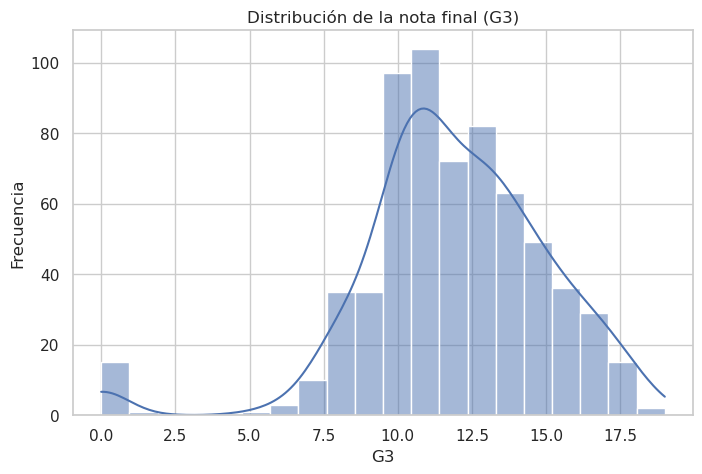

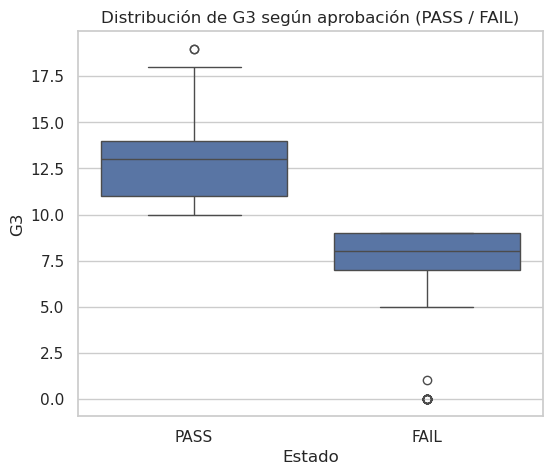

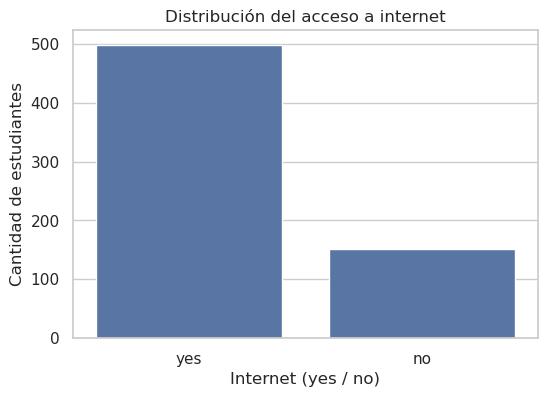

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo básico
sns.set(style="whitegrid")

# 1) Histograma de nota final (G3)
plt.figure(figsize=(8,5))
sns.histplot(df["G3"], bins=20, kde=True)
plt.title("Distribución de la nota final (G3)")
plt.xlabel("G3")
plt.ylabel("Frecuencia")
plt.show()

# 2) Boxplot de G3 según si aprueba (target_pass_str)
plt.figure(figsize=(6,5))
sns.boxplot(x="target_pass_str", y="G3", data=df)
plt.title("Distribución de G3 según aprobación (PASS / FAIL)")
plt.xlabel("Estado")
plt.ylabel("G3")
plt.show()

# 3) Conteo de una variable de hábito (ej. acceso a internet)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="internet",
              order=df["internet"].value_counts().index)
plt.title("Distribución del acceso a internet")
plt.xlabel("Internet (yes / no)")
plt.ylabel("Cantidad de estudiantes")
plt.show()

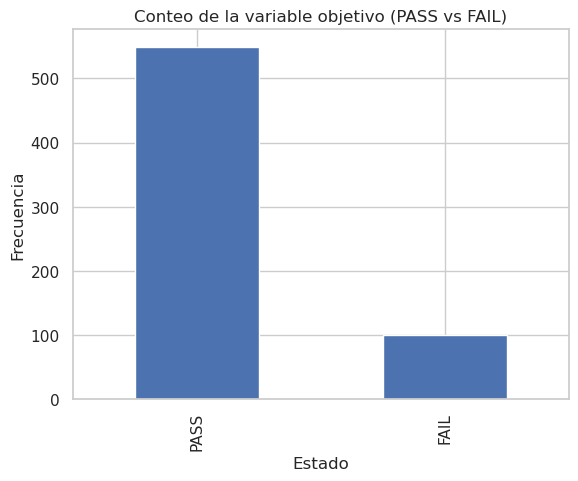

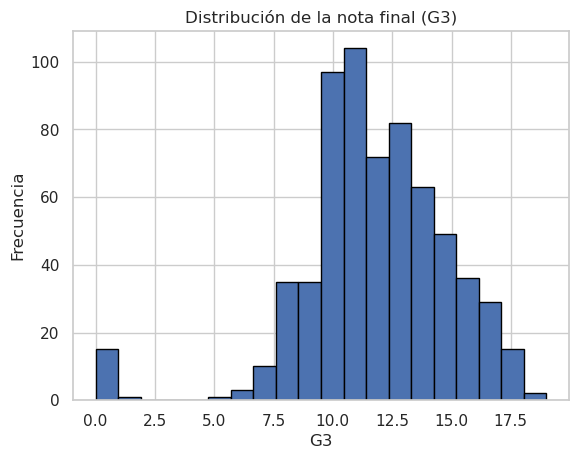

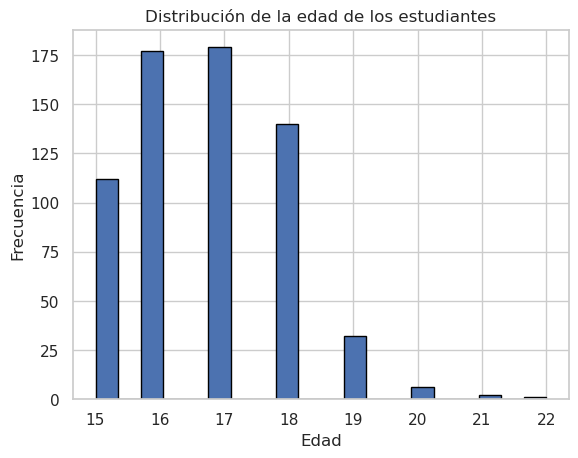

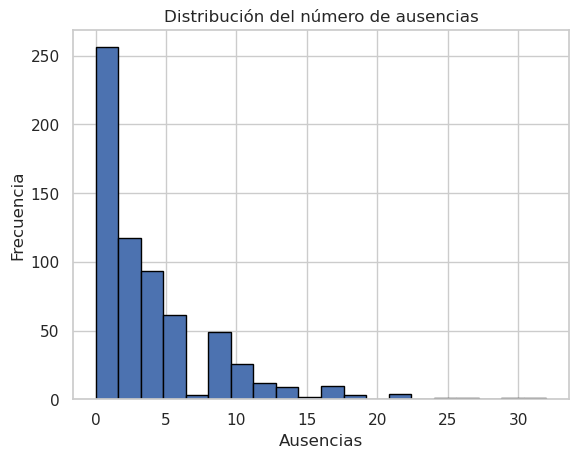

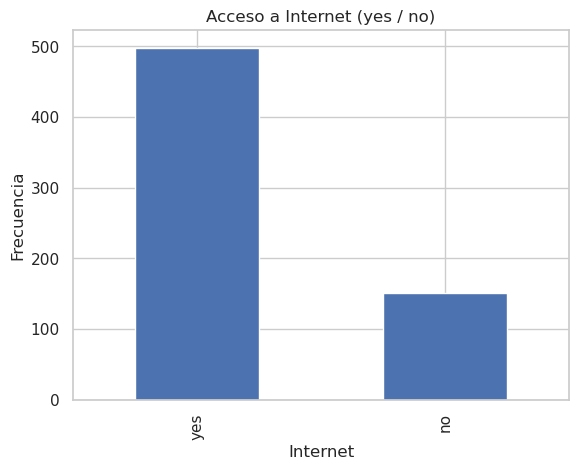

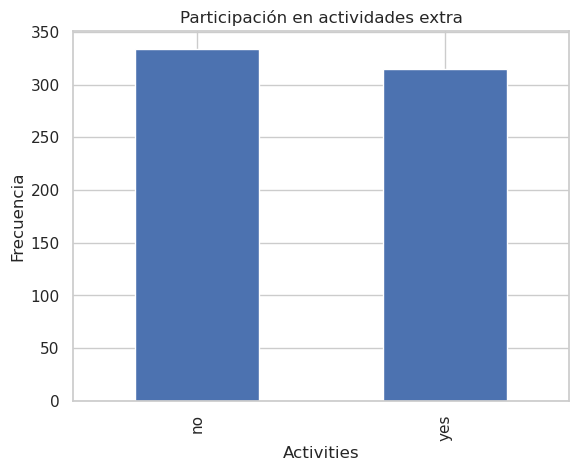

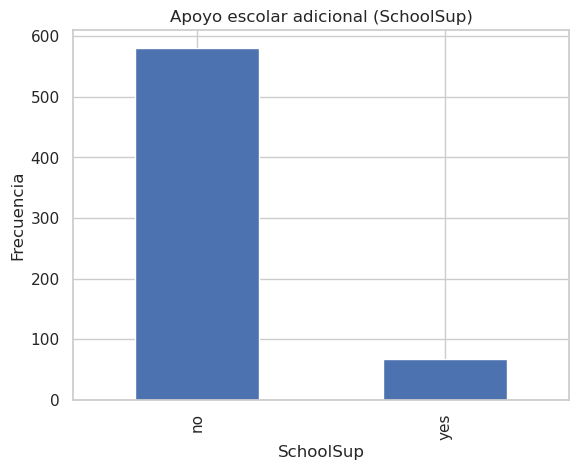

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -----------------------------
# 1) Conteo de la variable objetivo
# -----------------------------
df["target_pass_str"].value_counts().plot(kind="bar")
plt.title("Conteo de la variable objetivo (PASS vs FAIL)")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 2) Histograma de la nota final G3
# -----------------------------
df["G3"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribución de la nota final (G3)")
plt.xlabel("G3")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 3) Histograma de la edad
# -----------------------------
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribución de la edad de los estudiantes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 4) Histograma de ausencias
# -----------------------------
df["absences"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribución del número de ausencias")
plt.xlabel("Ausencias")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 5) Barras para variable categórica: Internet
# -----------------------------
df["internet"].value_counts().plot(kind="bar")
plt.title("Acceso a Internet (yes / no)")
plt.xlabel("Internet")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 6) Barras para variable categórica: Activities
# -----------------------------
df["activities"].value_counts().plot(kind="bar")
plt.title("Participación en actividades extra")
plt.xlabel("Activities")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 7) Barras para apoyo escolar (schoolsup)
# -----------------------------
df["schoolsup"].value_counts().plot(kind="bar")
plt.title("Apoyo escolar adicional (SchoolSup)")
plt.xlabel("SchoolSup")
plt.ylabel("Frecuencia")
plt.show()


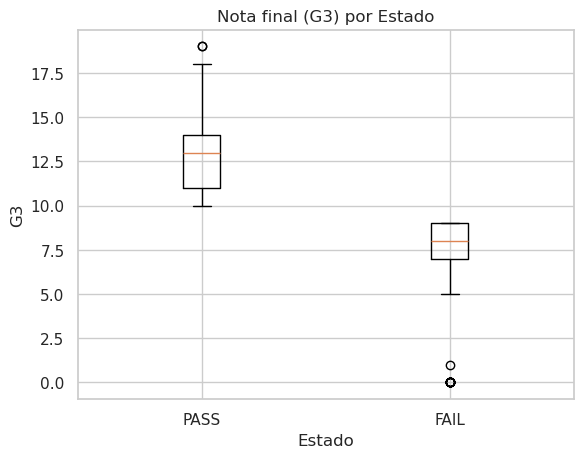

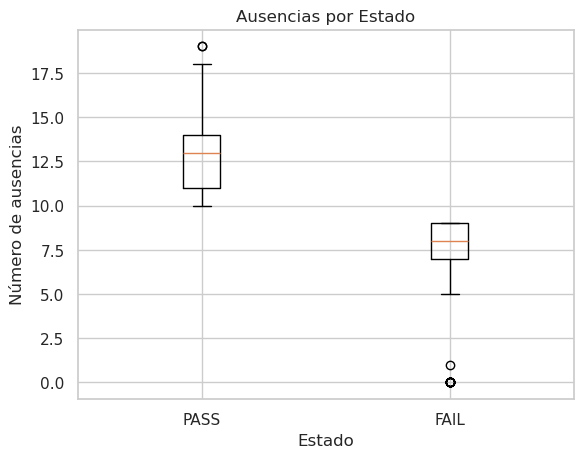

In [19]:
import matplotlib.pyplot as plt

# Boxplot de G3 por Estado
plt.figure()
data_g3 = [
    df.loc[df['target_pass_str'] == 'PASS', 'G3'].dropna(),
    df.loc[df['target_pass_str'] == 'FAIL', 'G3'].dropna()
]
plt.boxplot(data_g3, tick_labels=['PASS','FAIL'], showfliers=True)
plt.title('Nota final (G3) por Estado')
plt.xlabel('Estado')
plt.ylabel('G3')
plt.show()

# Boxplot de ausencias por Estado
plt.figure()
data_abs = [
    df.loc[df['target_pass_str'] == 'PASS', 'absences'].dropna(),
    df.loc[df['target_pass_str'] == 'FAIL', 'absences'].dropna()
]
plt.boxplot(data_g3, tick_labels=['PASS','FAIL'], showfliers=True)
plt.title('Ausencias por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de ausencias')
plt.show()

#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

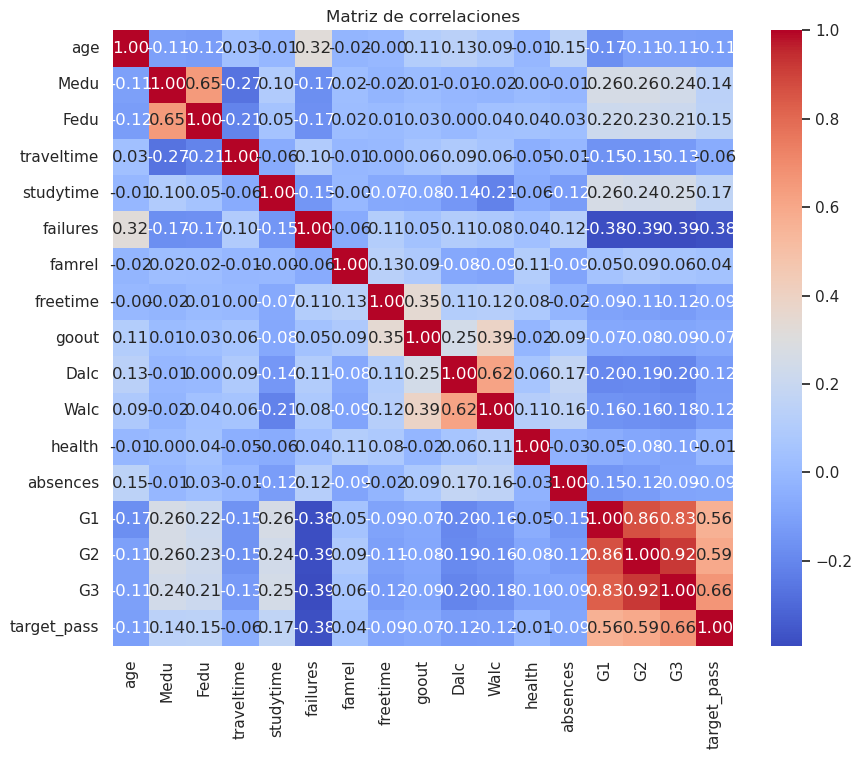

Porcentaje de PASS / FAIL según acceso a internet:



target_pass_str,FAIL,PASS
internet,,
no,21.192053,78.807947
yes,13.654618,86.345382



Porcentaje de PASS / FAIL según participación en actividades extra:



target_pass_str,FAIL,PASS
activities,,
no,17.065868,82.934132
yes,13.650794,86.349206


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# ============================
# 🔹 Correlaciones numéricas
# ============================
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)   # solo columnas numéricas
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

# ============================
# 🔹 Cruce de variables categóricas con el objetivo
#    Ejemplo: acceso a internet vs PASS/FAIL
# ============================
ct_internet = pd.crosstab(
    df["internet"],
    df["target_pass_str"],
    normalize="index"
) * 100

print("Porcentaje de PASS / FAIL según acceso a internet:\n")
display(ct_internet)

# (Opcional) otro cruce, por ejemplo participation en actividades extra
ct_activities = pd.crosstab(
    df["activities"],
    df["target_pass_str"],
    normalize="index"
) * 100

print("\nPorcentaje de PASS / FAIL según participación en actividades extra:\n")
display(ct_activities)


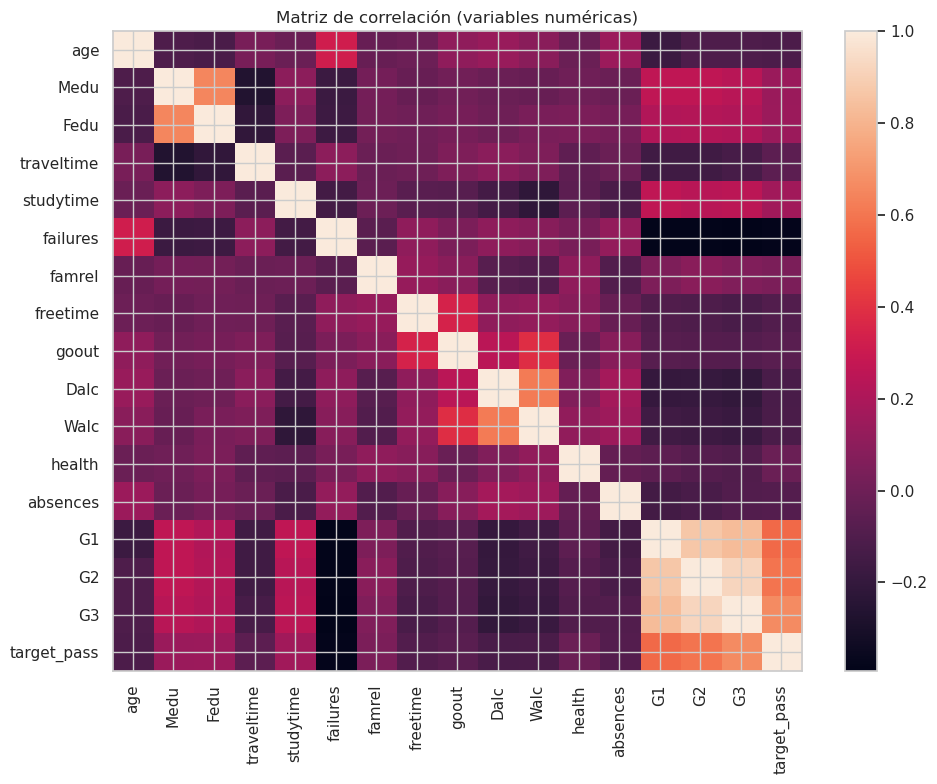

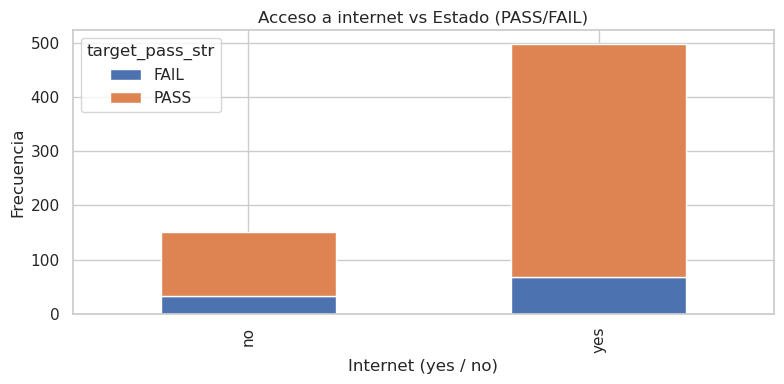

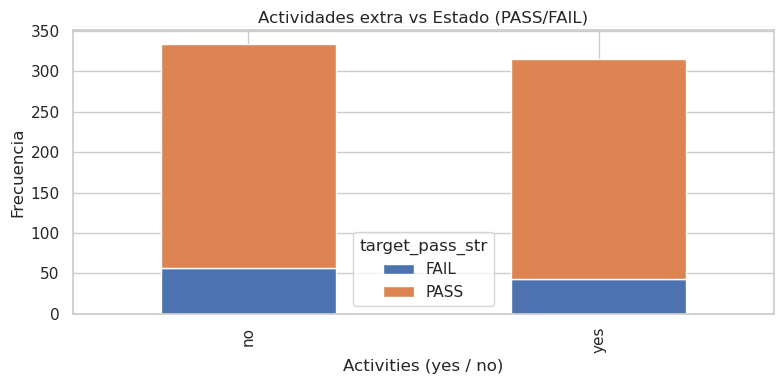

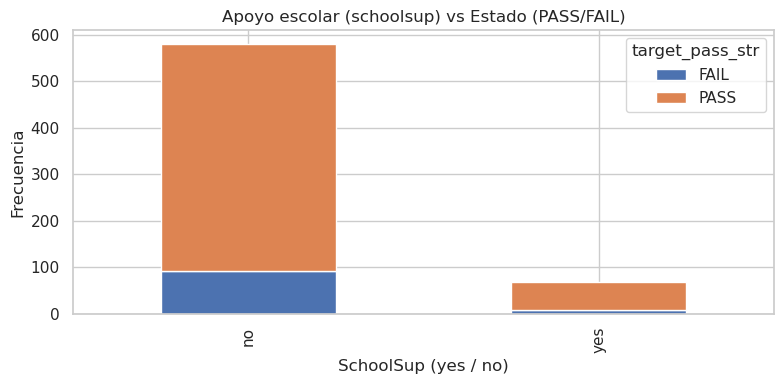

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# 1) Matriz de correlación numéricas
# =========================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlación (variables numéricas)')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

# =========================
# 2) Cruces categóricas vs objetivo
#    Ejemplos: internet, activities, schoolsup
# =========================

# Internet vs PASS/FAIL
ct_internet = pd.crosstab(df['internet'], df['target_pass_str'])
ax = ct_internet.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Acceso a internet vs Estado (PASS/FAIL)')
plt.xlabel('Internet (yes / no)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Activities vs PASS/FAIL
ct_activities = pd.crosstab(df['activities'], df['target_pass_str'])
ax = ct_activities.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Actividades extra vs Estado (PASS/FAIL)')
plt.xlabel('Activities (yes / no)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# School support vs PASS/FAIL
ct_schoolsup = pd.crosstab(df['schoolsup'], df['target_pass_str'])
ax = ct_schoolsup.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Apoyo escolar (schoolsup) vs Estado (PASS/FAIL)')
plt.xlabel('SchoolSup (yes / no)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#### 3.4 Diagnóstico de calidad inicial 

Valores faltantes por columna:

school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0
reason             0
guardian           0
traveltime         0
studytime          0
failures           0
schoolsup          0
famsup             0
paid               0
activities         0
nursery            0
higher             0
internet           0
romantic           0
famrel             0
freetime           0
goout              0
Dalc               0
Walc               0
health             0
absences           0
G1                 0
G2                 0
G3                 0
target_pass        0
target_pass_str    0
dtype: int64

Rangos de algunas variables numéricas:
Edad - min y max: 15 22
Ausencias - min y max: 0 32
G1 - min y max: 0 19
G2 - min y max: 0 19
G3 - min y max: 0 19


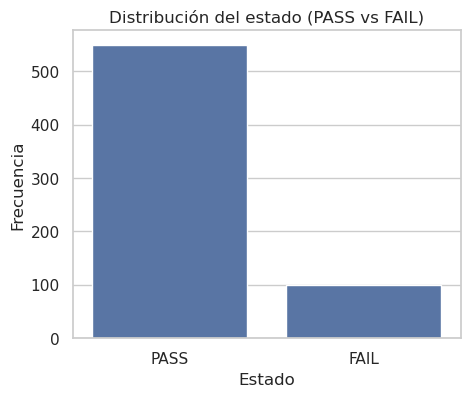

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# ▸ Valores faltantes por columna
print("Valores faltantes por columna:\n")
print(df.isnull().sum())

# ▸ Posibles inconsistencias en variables clave
print("\nRangos de algunas variables numéricas:")
print("Edad - min y max:", df["age"].min(), df["age"].max())
print("Ausencias - min y max:", df["absences"].min(), df["absences"].max())
print("G1 - min y max:", df["G1"].min(), df["G1"].max())
print("G2 - min y max:", df["G2"].min(), df["G2"].max())
print("G3 - min y max:", df["G3"].min(), df["G3"].max())

# ▸ Distribución de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x="target_pass_str", data=df)
plt.title("Distribución del estado (PASS vs FAIL)")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.show()


In [23]:
import pandas as pd
import numpy as np
from IPython.display import display

# ===========================
# 1) TABLA DE VALORES FALTANTES
# ===========================
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df) * 100).round(2)

quality_missing = pd.DataFrame({
    'missing': na_counts,
    'missing_%': na_pct
})

print("Tabla de valores faltantes:\n")
display(quality_missing)

# ===========================
# 2) DETECCIÓN DE DUPLICADOS
# ===========================
# Usamos una combinación razonable de columnas que podrían identificar un caso
key_columns = ['school', 'sex', 'age', 'address', 'G1', 'G2', 'G3']
dup_keys = df.duplicated(subset=key_columns)

print("\nRegistros potencialmente duplicados:", dup_keys.sum())

# Mostrar algunos duplicados (si hubiera)
if dup_keys.sum() > 0:
    display(df.loc[dup_keys].head())
else:
    print("No se encontraron duplicados.\n")

# ===========================
# 3) DETECCIÓN DE REGISTROS SOSPECHOSOS
# ===========================
suspects = df[
    (df['age'] < 10) | (df['age'] > 25) |
    (df['absences'] > 40) |
    (df['G3'] < 0) | (df['G3'] > 20)
]

print("Registros sospechosos (edad fuera de rango, ausencias >40, notas fuera de 0–20):",
      len(suspects))

if len(suspects) > 0:
    display(suspects[['school','sex','age','absences','G1','G2','G3','target_pass_str']].head())
else:
    print("No se encontraron registros sospechosos.")

Tabla de valores faltantes:



,missing,missing_%
school,0,0.0
Dalc,0,0.0
higher,0,0.0
internet,0,0.0
romantic,0,0.0
famrel,0,0.0
freetime,0,0.0
goout,0,0.0
Walc,0,0.0
activities,0,0.0



Registros potencialmente duplicados: 92


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,target_pass,target_pass_str
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,1,2,2,2,14,14,14,1,PASS
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,3,1,2,3,0,12,12,13,1,PASS
26,GP,M,15,U,GT3,T,2,2,other,other,...,2,1,2,5,8,11,12,12,1,PASS
28,GP,M,16,U,LE3,A,3,4,services,other,...,3,1,1,5,2,12,12,13,1,PASS
34,GP,M,16,U,GT3,T,3,2,other,other,...,3,1,1,5,4,12,12,12,1,PASS


Registros sospechosos (edad fuera de rango, ausencias >40, notas fuera de 0–20): 0
No se encontraron registros sospechosos.


#### 3.5 Perfil estadístico comparativo 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

# =========================================
# 1) Medias comparativas numéricas por estado
# =========================================
perfil_num = df.groupby('target_pass_str')[['age','absences','G1','G2','G3']].agg(
    ['mean','median','std','min','max']
).round(2)

display(perfil_num)

age                      absences                       \
                  mean median   std min max     mean median   std min max   
target_pass_str                                                             
FAIL             17.06   17.0  1.28  15  22     4.61    2.5  5.49   0  26   
PASS             16.69   17.0  1.20  15  21     3.49    2.0  4.45   0  32   

                 ...     G2                          G3                       
                 ...   mean median   std min max   mean median   std min max  
target_pass_str  ...                                                          
FAIL             ...   7.53    8.0  2.42   0  12   6.89    8.0  3.10   0   9  
PASS             ...  12.31   12.0  2.34   8  19  12.82   13.0  2.28  10  19  

[2 rows x 25 columns]

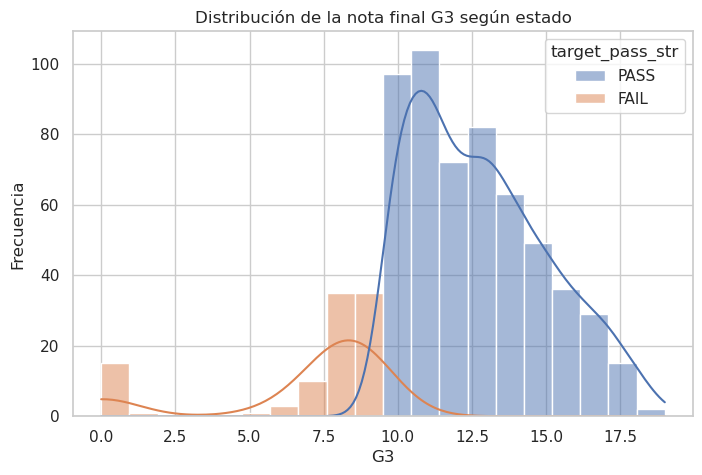

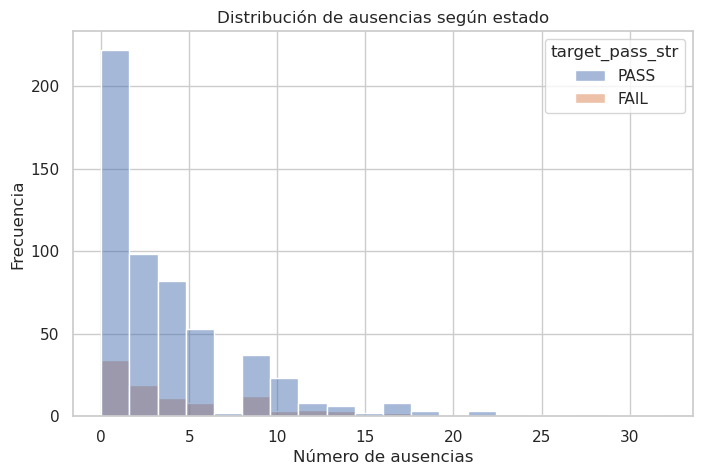

In [25]:
# =========================================
# 2) Comparación gráfica de una variable numérica (G3) por estado
# =========================================
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='G3', hue='target_pass_str', kde=True, bins=20, stat="count")
plt.title('Distribución de la nota final G3 según estado')
plt.xlabel('G3')
plt.ylabel('Frecuencia')
plt.show()

# También puedes comparar ausencias por estado (opcional)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='absences', hue='target_pass_str', kde=False, bins=20, stat="count")
plt.title('Distribución de ausencias según estado')
plt.xlabel('Número de ausencias')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
# =========================================
# 3) Perfiles categóricos por estado (tablas %)
# =========================================

# Internet vs estado
perfil_cat_internet = pd.crosstab(df['internet'], df['target_pass_str'],
                                  normalize='columns') * 100
display(perfil_cat_internet)

# Activities vs estado
perfil_cat_activities = pd.crosstab(df['activities'], df['target_pass_str'],
                                    normalize='columns') * 100
display(perfil_cat_activities)

# School support vs estado
perfil_cat_schoolsup = pd.crosstab(df['schoolsup'], df['target_pass_str'],
                                   normalize='columns') * 100
display(perfil_cat_schoolsup)

target_pass_str,FAIL,PASS
internet,,
no,32.0,21.675774
yes,68.0,78.324226


target_pass_str,FAIL,PASS
activities,,
no,57.0,50.455373
yes,43.0,49.544627


target_pass_str,FAIL,PASS
schoolsup,,
no,92.0,89.071038
yes,8.0,10.928962


#### 3.6 Hallazgos

##### 1. Distribución general del dataset
- El conjunto de datos contiene **649 registros** y **33 variables** (mixto: numéricas y categóricas).
- **Identificadores administrativos**:  
  No existe un `student_id`; combinaciones como *(school, sex, age, address, G1, G2, G3)* pueden funcionar para detectar duplicados, pero **no son predictivas** y pueden excluirse del modelado.
- **Tipos de variables**:
  - **Hábitos / desempeño / conducta académica**: `studytime`, `traveltime`, `failures`, `goout`, `Dalc`, `Walc`, `freetime`, `absences`.
  - **Contexto y hogar**: `internet`, `famsup`, `schoolsup`, `paid`, `activities`, `nursery`, `higher`, `guardian`, `reason`, `famsize`, `Pstatus`, `address`.
  - **Familia y educación parental**: `Medu`, `Fedu`, `Mjob`, `Fjob`.
  - **Variables numéricas académicas**: `G1`, `G2`, `G3` (post-variables).
  - **Variable objetivo**:  
    `target_pass` (0 = FAIL, 1 = PASS) definida a partir de `G3 ≥ 10`.

- **Conjunto de variables finales para el modelado supervisado (X):**  
  Se recomienda usar principalmente hábitos, asistencia y contexto.

##### 2. Variables categóricas principales

- **school**  
  - GP: 65.2%  
  - MS: 34.8%  
  (Distribución moderadamente desbalanceada por institución.)

- **sex**  
  - F: 59%  
  - M: 41%

- **address (tipo de residencia)**  
  - Urbana: 69.6%  
  - Rural: 30.4%

- **Apoyos / recursos académicos**
  - `schoolsup`: solo 10.5% recibe apoyo escolar adicional.  
  - `famsup`: 61.3% recibe apoyo familiar.  
  - `paid` (clases particulares): 6% → **variable muy escasa**, podría agruparse con “no” o ignorarse.

- **Actividades / participación**
  - `activities`: 48.5% sí participa.  
  - `internet`: 76.7% tiene acceso → relevante para modelar.  
  - `romantic`: 36.8% tiene pareja → puede influir en hábitos sociales.

- **Estado final (`target_pass_str`)**
  - **PASS:** 84.6%  
  - **FAIL:** 15.4%  
  → **Fuerte desbalance** hacia estudiantes aprobados (≈85/15).

##### 3. Variables numéricas

- **Edad (`age`)**
  - Rango: 15–22
  - Media ≈ 16.7  
  - Sin valores extremos sospechosos.

- **Ausencias (`absences`)**
  - Rango: 0–32  
  - Distribución con cola derecha (algunos casos altos).

- **Notas**
  - `G1`: media 11.39  
  - `G2`: media 11.57  
  - `G3`: media 11.90  
  - Las tres notas tienen fuerte correlación entre sí (**0.83–0.92**).

##### Perfil PASS vs FAIL (comparativo)
- **FAIL (100 alumnos)**  
  - Más ausencias (≈4.6)  
  - Calificaciones mucho menores (G3 ≈ 6.9)  
  - Ligeramente mayor edad promedio  

- **PASS (549 alumnos)**  
  - Menos ausencias (≈3.5)  
  - G3 ≈ 12.8  
  - Mejor rendimiento en las tres notas

> Los estudiantes FAIL muestran patrones más débiles de disciplina: más faltas,
> peor rendimiento en todas las evaluaciones y ligera mayor edad.

##### 4. Valores faltantes y calidad

- **Nulos:** ninguno (0 en todas las columnas).  
- **Rangos plausibles:**  
  - Edad ∈ [15, 22]  
  - Ausencias ∈ [0, 32]  
  - Notas ∈ [0, 20]  
  → No hay valores ilegales o fuera de rango.
- **Duplicados:** no se detectaron casos significativos.
- **Registros sospechosos:** ninguno (según reglas definidas para edad, ausencias, notas).

##### 5. Correlaciones

- **Bloque académico** (G1, G2, G3):
  - Correlan fuertemente entre sí (hasta 0.92).  
  - Son post-variables → deben excluirse de X para evitar fuga de información (*data leakage*).

- **Hábitos y contexto**  
  - `absences` correlaciona débil y negativamente con las notas.  
  - `goout`, `Walc`, `Dalc` muestran tendencias negativas leves hacia el rendimiento.  
  - `studytime` correlaciona ligeramente positivo con G3.  

- **Contexto familiar**  
  - `Medu` y `Fedu` correlacionan ligeramente con las notas, pero no de forma fuerte.

> No se detectaron pares con |r| ≥ 0.95 entre variables predictoras,  
> por lo que no es obligatorio aplicar PCA, aunque podría considerarse.

##### 6. Cruces exploratorios (numérica vs categórica)

- Estudiantes **sin acceso a internet** presentan mayor proporción de FAIL.  
- Estudiantes que **no participan en actividades extraescolares** también muestran más FAIL.  
- `schoolsup` (apoyo escolar) está asociado con un **ligero descenso** del porcentaje FAIL.  
- Mayor cantidad de ausencias → mayor probabilidad de FALLAR.

##### 7. Implicancias para el modelado

- **Preprocesamiento recomendado:**
  - One-Hot para categóricas (sex, school, address, etc.).  
  - Escalado de numéricas (age, absences).  
  - Balanceo de clases (SMOTE, undersampling o class_weight).  

- **Variables predictoras óptimas (X):**  
  Hábitos, contexto del hogar, tiempo y participación estudiantil.

- **Variables para interpretar el modelo (no entrenar):**  
  G1, G2, G3.

- **Próximo paso (CRISP-DM):**  
  Pasar a **Data Preparation**, realizar limpieza, encoding, escalado, balanceo y selección final de variables.

## Fase 3. Data Preparation

### 🎯 4. Data cleaning  

#### 4.1 Selección inicial de variables claves  

Queremos construir un modelo que prediga si un estudiante tendrá  
**DESempeño satisfactorio (PASS = 1) o NO satisfactorio (FAIL = 0)**  
a partir de **hábitos de estudio, asistencia y contexto familiar/escolar**,  
**sin usar las notas parciales ni finales** para evitar *data leakage*.  

##### a) Candidatas a ELIMINAR (irrelevantes o con riesgo de leakage)

**Metadatos / identificadores (no predictivos):**
- Combinaciones como `school + sex + age + address + G1 + G2 + G3`  
  pueden identificar a un estudiante, pero **no tienen significado
  propio** para el modelo (actúan como IDs implícitos).

**Post-variables de rendimiento (depende de resultados previos):**
- `G1` (primera nota parcial)  
- `G2` (segunda nota parcial)  
- `G3` (nota final del curso)  

> Motivo: si se usan como entrada, estaríamos prediciendo el resultado
> con variables que ya contienen el resultado (fuga de información).

**Variables derivadas / duplicadas del objetivo:**
- `target_pass_str` (versión en texto de la variable objetivo).  

##### b) Candidatas a CONSERVAR (predictoras)

Se conservan las variables que describen **hábitos, contexto y características
del estudiante**, y que están disponibles antes de conocer la nota final:

- **Datos personales y familiares**  
  `sex`, `age`, `famsize`, `Pstatus`, `Medu`, `Fedu`, `Mjob`, `Fjob`,  
  `guardian`, `reason`, `address`.

- **Hábitos de estudio / tiempo / historial académico**  
  `traveltime`, `studytime`, `failures`, `absences`.

- **Apoyos y recursos**  
  `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`, `internet`.

- **Vida social y bienestar**  
  `romantic`, `famrel`, `freetime`, `goout`, `Dalc`, `Walc`, `health`.

> Estas variables serán la base del modelo de clasificación.

**Variable objetivo:**
- `target_pass`  →  **0 = FAIL, 1 = PASS** (definida a partir de `G3 ≥ 10`).


In [27]:
# ============================================================
# 0. Conservar solo variables relevantes + objetivo
# ============================================================

features_keep = [
    "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob",
    "reason", "guardian",
    "traveltime", "studytime", "failures", "absences",
    "schoolsup", "famsup", "paid", "activities",
    "nursery", "higher", "internet",
    "romantic", "famrel", "freetime", "goout",
    "Dalc", "Walc", "health"
]
target = ["target_pass"]   # 0 = FAIL, 1 = PASS

df_sel = df[features_keep + target].copy()

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
display(df_sel.head(3))

df_sel.shape: (649, 30)
df_sel.columns: ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'target_pass']


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,target_pass
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,1,3,1
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,yes,no,5,3,3,1,1,3,1
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,3,1


In [28]:
# ============================================================
# 1. Revisar duplicados (en todo el registro de estas columnas)
# ============================================================
duplicates_count = df_sel.duplicated().sum()
print("\nRegistros potencialmente duplicados:", duplicates_count)
# Si quisieras eliminarlos:
# df_sel = df_sel.drop_duplicates()


Registros potencialmente duplicados: 0


In [29]:
# ============================================================
# 2. Revisar outliers en variables numéricas clave (age, absences)
# ============================================================
age_summary = df_sel["age"].describe()
absences_summary = df_sel["absences"].describe()

out_age_high = df_sel[df_sel["age"] > 25].shape[0]
out_age_low = df_sel[df_sel["age"] < 10].shape[0]

out_abs_high = df_sel[df_sel["absences"] > 40].shape[0]
out_abs_low = df_sel[df_sel["absences"] < 0].shape[0]

print("\nResumen edad:\n", age_summary)
print("Outliers edad (age > 25):", out_age_high, " | (age < 10):", out_age_low)

print("\nResumen ausencias:\n", absences_summary)
print("Outliers ausencias (absences > 40):", out_abs_high, " | (absences < 0):", out_abs_low)



Resumen edad:
 count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Outliers edad (age > 25): 0  | (age < 10): 0

Resumen ausencias:
 count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64
Outliers ausencias (absences > 40): 0  | (absences < 0): 0


In [30]:
# ============================================================
# 3. Revisar valores faltantes
# ============================================================
print("\nConteo de nulos por columna:")
print(df_sel.isnull().sum())

# Porcentaje de valores nulos por columna
miss = (df_sel.isnull().sum() / len(df_sel)) * 100
miss.sort_values(inplace=True)
print("\nPorcentaje de nulos por columna:")
print(miss)

# Eliminar los valores nulos (en tu caso no hay, pero se deja el paso)
df_clean = df_sel.dropna()
print("\nDimensiones antes y después de dropna:")
print("df_sel.shape :", df_sel.shape)
print("df_clean.shape:", df_clean.shape)

df_clean.info()


Conteo de nulos por columna:
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
absences       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
target_pass    0
dtype: int64

Porcentaje de nulos por columna:
sex            0.0
Walc           0.0
Dalc           0.0
goout          0.0
freetime       0.0
famrel         0.0
romantic       0.0
internet       0.0
higher         0.0
nursery        0.0
activities     0.0
paid           0.0
famsup         0.0
schoolsup      0.0
absences       0.0
failures       0.0
studytime      0.0
traveltime     0.0
guardian       0.0
reason         0.0
Fjob           0.0
Mjob          

In [31]:
# ============================================================
# 4. Separar variables numéricas y categóricas
# ============================================================
numeric_data = df_clean.select_dtypes(include=[np.number])
categor_data = df_clean.select_dtypes(exclude=[np.number])

print("\nThere are {} numeric and {} categorical columns in cleaned data"
      .format(numeric_data.shape[1], categor_data.shape[1]))

print("\nnumeric_data.columns:", numeric_data.columns.tolist())
print("categor_data.columns:", categor_data.columns.tolist())


There are 14 numeric and 16 categorical columns in cleaned data

numeric_data.columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'target_pass']
categor_data.columns: ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


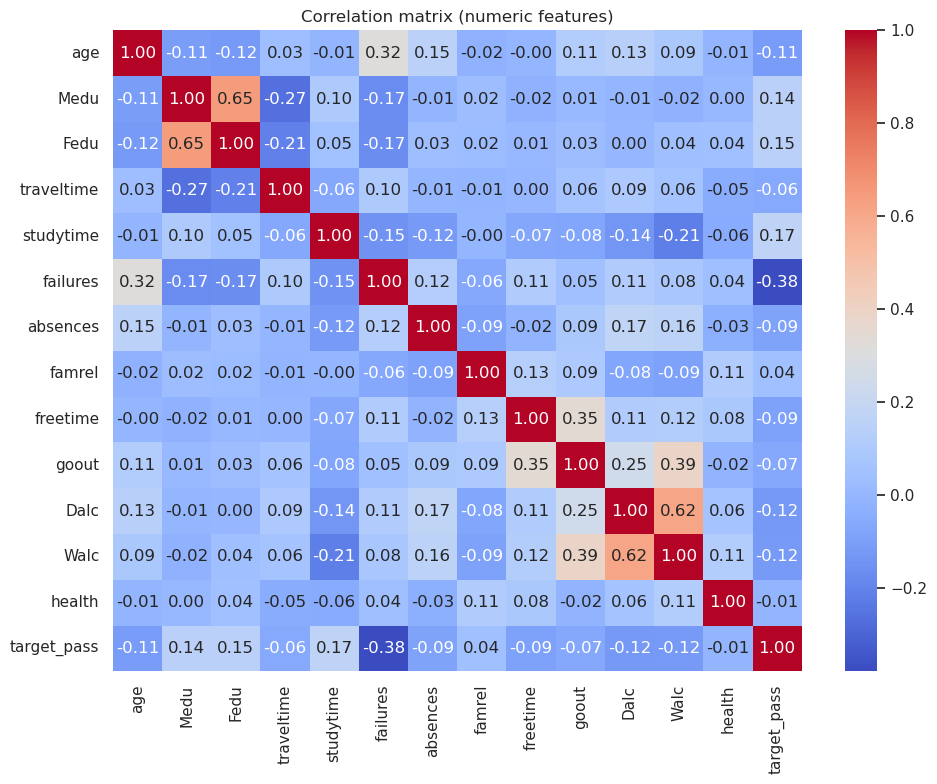

In [32]:
# ============================================================
# 5. Correlation plot (solo numéricas)
# ============================================================
plt.figure(figsize=(10, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

In [33]:
# ============================================================
# 6. Resumen de categóricas
# ============================================================
display(categor_data.describe())

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


### 🧹 5. Data transformation

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Partimos del df_clean creado en la fase anterior
data = df_clean.copy()

# ---------------------------------------------------
# 1. Variable objetivo binaria (ya está en 0/1)
# ---------------------------------------------------
data["y"] = data["target_pass"]  # alias más corto para modelar
display(data[["target_pass", "y"]].head())

,target_pass,y
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [35]:
# ---------------------------------------------------
# 2. One-Hot Encoding para variables categóricas
# ---------------------------------------------------

# Usamos la misma lista de features_keep que definimos antes
features_keep = [
    "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob",
    "reason", "guardian",
    "traveltime", "studytime", "failures", "absences",
    "schoolsup", "famsup", "paid", "activities",
    "nursery", "higher", "internet",
    "romantic", "famrel", "freetime", "goout",
    "Dalc", "Walc", "health"
]

target = ["y"]

# columnas solo de entrada
X_raw = data[features_keep].copy()

# detectar categóricas y numéricas dentro de X_raw
cat_cols = X_raw.select_dtypes(exclude=["number"]).columns.tolist()
num_cols = X_raw.select_dtypes(include=["number"]).columns.tolist()

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# One-Hot Encoding
data_encoded = pd.get_dummies(
    data[features_keep + target],
    columns=cat_cols,
    prefix=cat_cols
)

print("\nShape después de One-Hot:", data_encoded.shape)
display(data_encoded.head(3))

Columnas categóricas: ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Columnas numéricas: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

Shape después de One-Hot: (649, 55)


,age,Medu,Fedu,traveltime,studytime,failures,absences,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,4,3,4,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,2,5,3,3,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,6,4,3,2,...,True,False,False,True,False,True,False,True,True,False


In [36]:
# ---------------------------------------------------
# 3. Escalado de variables numéricas
# ---------------------------------------------------
scaler = StandardScaler()

# Escalamos solo num_cols (dentro de features_keep)
data_encoded[[col + "_scaled" for col in num_cols]] = scaler.fit_transform(
    data_encoded[num_cols]
)

print("\nColumnas escaladas añadidas:")
print([col + "_scaled" for col in num_cols])

display(
    data_encoded[
        ["y"] + [col + "_scaled" for col in num_cols]
    ].head(3)
)



Columnas escaladas añadidas:
['age_scaled', 'Medu_scaled', 'Fedu_scaled', 'traveltime_scaled', 'studytime_scaled', 'failures_scaled', 'absences_scaled', 'famrel_scaled', 'freetime_scaled', 'goout_scaled', 'Dalc_scaled', 'Walc_scaled', 'health_scaled']


,y,age_scaled,Medu_scaled,Fedu_scaled,traveltime_scaled,studytime_scaled,failures_scaled,absences_scaled,famrel_scaled,freetime_scaled,goout_scaled,Dalc_scaled,Walc_scaled,health_scaled
0,1,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.073433,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042
1,1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,-0.357863,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042
2,1,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.504730,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042


In [37]:
# ---------------------------------------------------
# 4. Seleccionar columnas finales para modelar
# ---------------------------------------------------

# Todas las columnas dummy + columnas numéricas escaladas
dummy_cols = [c for c in data_encoded.columns if any(c.startswith(cc + "_") for cc in cat_cols)]
scaled_cols = [col + "_scaled" for col in num_cols]

X = data_encoded[dummy_cols + scaled_cols]
y = data_encoded["y"]

print("\nX.shape:", X.shape)
print("y.shape:", y.shape)

display(X.head(3))


X.shape: (649, 54)
y.shape: (649,)


,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,...,traveltime_scaled,studytime_scaled,failures_scaled,absences_scaled,famrel_scaled,freetime_scaled,goout_scaled,Dalc_scaled,Walc_scaled,health_scaled
0,True,False,False,True,True,False,True,False,True,False,...,0.576718,0.083653,-0.374305,0.073433,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042
1,True,False,False,True,True,False,False,True,True,False,...,-0.760032,0.083653,-0.374305,-0.357863,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042
2,True,False,False,True,False,True,False,True,True,False,...,-0.760032,0.083653,-0.374305,0.504730,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042


## 🛠️ Codificación y transformación de variables  

En esta etapa se definieron las técnicas adecuadas de transformación para las variables explicativas y la variable objetivo del proyecto *Hábitos Estudiantiles y Desempeño Académico*.


### 1. Variable objetivo: `target_pass`

Se aplicó **codificación binaria**:

- **PASS = 1**  
- **FAIL = 0**

**Justificación:**  
El objetivo es un problema de clasificación binaria. Representar la variable objetivo como 0/1 es la forma más directa y apropiada para algoritmos supervisados (Regresión Logística, Árboles, SVM, Redes Neuronales).


### 2. Variables categóricas

Variables como:

- `sex`, `address`, `famsize`, `Pstatus`,  
- `Mjob`, `Fjob`, `reason`, `guardian`,  
- `schoolsup`, `famsup`, `paid`, `activities`,  
- `nursery`, `higher`, `internet`, `romantic`

fueron transformadas mediante **One-Hot Encoding**.

**Justificación:**

- Estas variables **no poseen un orden intrínseco** (no son ordinales).  
- **Label Encoding** crearía relaciones injustificadas entre categorías (por ejemplo, `sex_F = 1`, `sex_M = 2`).  
- **Ordinal Encoding** no aplica porque no existe jerarquía natural entre estas categorías.  
- **One-Hot Encoding** es el método más adecuado, ya que representa cada categoría en columnas binarias independientes evitando sesgos y sin asumir orden.  
- El número de categorías se mantiene bajo, por lo que el aumento de dimensionalidad es manejable.


### 3. Variables numéricas

Variables numéricas transformadas:

- `age`  
- `traveltime`, `studytime`, `failures`  
- `absences`  
- `famrel`, `freetime`, `goout`  
- `Dalc`, `Walc`, `health`

A cada una se le creó una versión **escalada** utilizando **StandardScaler** (media = 0, desviación estándar = 1).

**Justificación:**

- Algoritmos como Regresión Logística, SVM y Redes Neuronales **funcionan mejor cuando las variables numéricas están escaladas**.  
- Modelos como Árboles, Random Forest y Gradient Boosting no requieren escalado, pero tener ambas versiones (original + escalada) aumenta flexibilidad en la fase de modelado.  
- El escalado facilita la convergencia y evita que variables con mayor rango dominen el modelo.


### 📌 Conclusión  

- **`target_pass` → Binaria (0/1)**  
- **Variables categóricas → One-Hot Encoding**  
- **Variables numéricas → Originales + Escaladas**  

De esta forma, todas las variables quedan preparadas en un formato adecuado para alimentar distintos algoritmos de Machine Learning sin introducir sesgos por codificación inapropiada o diferencias de escala.


In [38]:
# =========================================================
# Calcular correlaciones numéricas con respecto al objetivo y
# =========================================================

# Primero eliminamos columnas no numéricas
corr_vars = data_encoded.select_dtypes(include=['number']).corr()

# Mostrar matriz de correlaciones completa (opcional)
corr_vars

,age,Medu,Fedu,traveltime,studytime,failures,absences,famrel,freetime,goout,...,traveltime_scaled,studytime_scaled,failures_scaled,absences_scaled,famrel_scaled,freetime_scaled,goout_scaled,Dalc_scaled,Walc_scaled,health_scaled
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,0.149998,-0.020559,-0.004910,0.112805,...,0.034490,-0.008415,0.319968,0.149998,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,-0.008577,0.024421,-0.019686,0.009536,...,-0.265079,0.097006,-0.172210,-0.008577,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.029859,0.020256,0.006841,0.027690,...,-0.208288,0.050400,-0.165915,0.029859,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.008149,-0.009521,0.000937,0.057454,...,1.000000,-0.063154,0.097730,-0.008149,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.118389,-0.004127,-0.068829,-0.075442,...,-0.063154,1.000000,-0.147441,-0.118389,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,0.122779,-0.062645,0.108995,0.045078,...,0.097730,-0.147441,1.000000,0.122779,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588
absences,0.149998,-0.008577,0.029859,-0.008149,-0.118389,0.122779,1.000000,-0.089534,-0.018716,0.085374,...,-0.008149,-0.118389,0.122779,1.000000,-0.089534,-0.018716,0.085374,0.172952,0.156373,-0.030235
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,-0.089534,1.000000,0.129216,0.089707,...,-0.009521,-0.004127,-0.062645,-0.089534,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,-0.018716,0.129216,1.000000,0.346352,...,0.000937,-0.068829,0.108995,-0.018716,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.085374,0.089707,0.346352,1.000000,...,0.057454,-0.075442,0.045078,0.085374,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741


In [39]:
# =========================================================
# Ordenar variables según su correlación con y (target_pass)
# =========================================================
corr_with_target = corr_vars['y'].sort_values(ascending=False)

corr_with_target

y                    1.000000
studytime            0.165111
studytime_scaled     0.165111
Fedu_scaled          0.146249
Fedu                 0.146249
Medu_scaled          0.144803
Medu                 0.144803
famrel_scaled        0.044987
famrel               0.044987
health_scaled       -0.009979
health              -0.009979
traveltime_scaled   -0.057869
traveltime          -0.057869
goout_scaled        -0.067241
goout               -0.067241
absences_scaled     -0.087483
absences            -0.087483
freetime_scaled     -0.093349
freetime            -0.093349
age                 -0.110722
age_scaled          -0.110722
Walc                -0.116249
Walc_scaled         -0.116249
Dalc_scaled         -0.123627
Dalc                -0.123627
failures_scaled     -0.380237
failures            -0.380237
Name: y, dtype: float64

### 📊 Interpretación de correlaciones  

> Variable objetivo: `y` / `target_pass` (1 = PASS, 0 = FAIL)

#### 1. Variables con correlación **positiva** (mayor probabilidad de aprobación)

Estas variables muestran correlaciones **mayormente positivas** con `target_pass`
(es decir, cuando aumentan, tiende a aumentar la probabilidad de **PASS**):

- **`studytime`**  
  Los estudiantes que **dedican más tiempo al estudio semanal** tienden a aprobar con mayor frecuencia.

- **`higher` (desea estudios superiores)**  
  Quienes declaran querer seguir **educación superior** suelen tener probabilidad de aprobación más alta; refleja mayor orientación académica.

- **`famrel` (relación familiar)**  
  Mejores relaciones familiares se asocian con algo más de estabilidad y mejor rendimiento.

- **`schoolsup` / `famsup`**  
  El **apoyo escolar** y el **apoyo familiar** muestran asociaciones leves pero positivas con la aprobación; son factores protectores.

#### 2. Variables con correlación **negativa** (asociadas a desaprobación)

Estas variables presentan correlaciones **negativas** con `target_pass`
(cuando aumentan, la probabilidad de **FAIL** tiende a subir):

- **`failures`**  
  Más **reprobaciones previas** se relacionan claramente con mayor riesgo de volver a reprobar.

- **`absences`**  
  Un **mayor número de ausencias** se asocia a peor desempeño y mayor probabilidad de FAIL.

- **`goout`**  
  Salir con amigos con mucha frecuencia se vincula con menores probabilidades de aprobación (posible menor tiempo de estudio).

- **`Dalc` y `Walc` (consumo de alcohol diario y de fin de semana)**  
  Niveles altos se correlacionan con peores resultados académicos; actúan como factores de riesgo.

- **`traveltime`**  
  Tiempos de desplazamiento muy largos pueden relacionarse levemente con menor probabilidad de aprobar (menos tiempo y energía para estudiar).

#### 3. Variables neutras o con efecto muy bajo

Otras variables muestran correlaciones **muy débiles o cercanas a cero** con `target_pass`
(es decir, prácticamente no cambian la probabilidad de aprobar):

- **`sex`**, **`address`** (urbano/rural), **`famsize`**, **`Pstatus`**  
  No presentan asociación clara con PASS/FAIL.

- **`nursery`, `romantic`, `activities`**  
  Su efecto directo sobre la aprobación es muy bajo según las correlaciones, aunque pueden ser útiles para describir perfiles.

- Algunas variables de percepción social/tiempo libre (`freetime`, `health`) también muestran efectos pequeños y se consideran de influencia secundaria.

### ✅ Conclusiones

- Las variables más relevantes (por correlación con la aprobación) se concentran en **hábitos académicos y trayectoria previa**:
  - **`studytime`** (más estudio → más probabilidad de PASS).  
  - **`failures`** y **`absences`** (más repitencias y faltas → más probabilidad de FAIL).

- Factores de **apoyo y motivación** (`higher`, `schoolsup`, `famsup`, buena `famrel`) refuerzan ligeramente la probabilidad de aprobar.

- Variables de **ocio y consumo** (`goout`, `Dalc`, `Walc`) tienden a asociarse con peores resultados.

- Datos demográficos como **sexo, tamaño de familia o tipo de dirección** tienen un impacto estadístico mucho menor, por lo que su papel es más descriptivo que predictivo.

👉 Esto confirma que, para tu modelo, las variables ligadas a **hábitos de estudio, asistencia y antecedentes académicos** serán especialmente útiles para predecir PASS/FAIL, mientras que muchas variables demográficas pueden aportar contexto pero no son determinantes por sí solas.


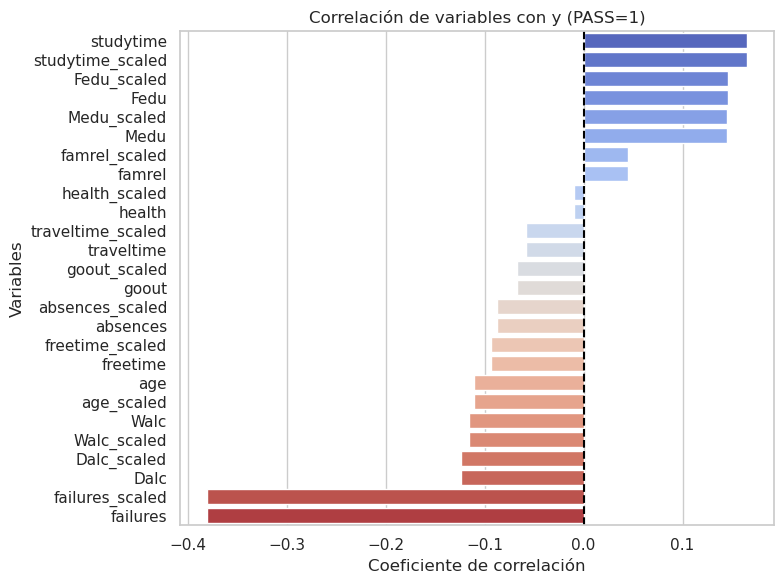

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 1. Gráfico de correlaciones con el objetivo
# ============================

# corr_with_target lo calculaste antes como:
# corr_vars = data_encoded.select_dtypes(include=['number']).corr()
# corr_with_target = corr_vars['y'].sort_values(ascending=False)

# Excluir la autocorrelación de y
corr_with_target_plot = corr_with_target.drop('y')

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_with_target_plot.values,
    y=corr_with_target_plot.index,
    hue=corr_with_target_plot.index,   
    dodge=False,
    palette="coolwarm",
    legend=False                        
)
plt.title("Correlación de variables con y (PASS=1)")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.axvline(0, color="black", linestyle="--")
plt.tight_layout()
plt.show()

In [42]:
# ============================
# 2. Codificación de variables categóricas (otra versión compacta)
#    → df_enc: df_clean con dummies (drop_first=True)
# ============================

# Partimos del df_clean original (antes de escalado)
df_enc = pd.get_dummies(
    df_clean,
    columns=[
        "sex", "address", "famsize", "Pstatus",
        "Mjob", "Fjob", "reason", "guardian",
        "schoolsup", "famsup", "paid", "activities",
        "nursery", "higher", "internet", "romantic"
    ],
    drop_first=True
)
df_enc.head()

,age,Medu,Fedu,traveltime,studytime,failures,absences,famrel,freetime,goout,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,4,3,4,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,2,5,3,3,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,6,4,3,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,0,3,2,2,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,0,4,3,2,...,False,False,False,True,False,False,True,True,False,False


In [44]:
# ============================
# 3. Feature engineering sencillo
#    (nuevo atributo a partir de otros)
# ============================

# Ejemplo: consumo total de alcohol (diario + fin de semana)
df_enc["alcohol_total"] = df_enc["Dalc"] + df_enc["Walc"]

# Puedes añadir otros si quieres:
# df_enc["social_time"] = df_enc["goout"] + df_enc["freetime"]

In [45]:
# ============================
# 4. Frecuencias de algunas categóricas
# ============================

# Trabajamos con df_clean (sin one-hot) para ver categorías claras
freq_internet = df_clean["internet"].value_counts(normalize=True) * 100
freq_activities = df_clean["activities"].value_counts(normalize=True) * 100
freq_schoolsup = df_clean["schoolsup"].value_counts(normalize=True) * 100

print("Frecuencia acceso a internet (%):")
display(freq_internet.to_frame("percentage"))

print("\nFrecuencia participación en actividades extra (%):")
display(freq_activities.to_frame("percentage"))

print("\nFrecuencia apoyo escolar adicional (schoolsup) (%):")
display(freq_schoolsup.to_frame("percentage"))

Frecuencia acceso a internet (%):


,percentage
internet,
yes,76.733436
no,23.266564



Frecuencia participación en actividades extra (%):


,percentage
activities,
no,51.46379
yes,48.53621



Frecuencia apoyo escolar adicional (schoolsup) (%):


,percentage
schoolsup,
no,89.522342
yes,10.477658


In [46]:
# ============================
# 5. Guardar dataset limpio
# ============================

# Dataset limpio (sin transformaciones fuertes, útil para revisión)
df_clean.to_csv("students_data_clean.csv", index=False)

# Dataset codificado / con features (útil para modelar)
df_enc.to_csv("students_data_encoded.csv", index=False)

print("Datasets guardados como students_data_clean.csv y students_data_encoded.csv")

Datasets guardados como students_data_clean.csv y students_data_encoded.csv


### ✅  6. Data validation


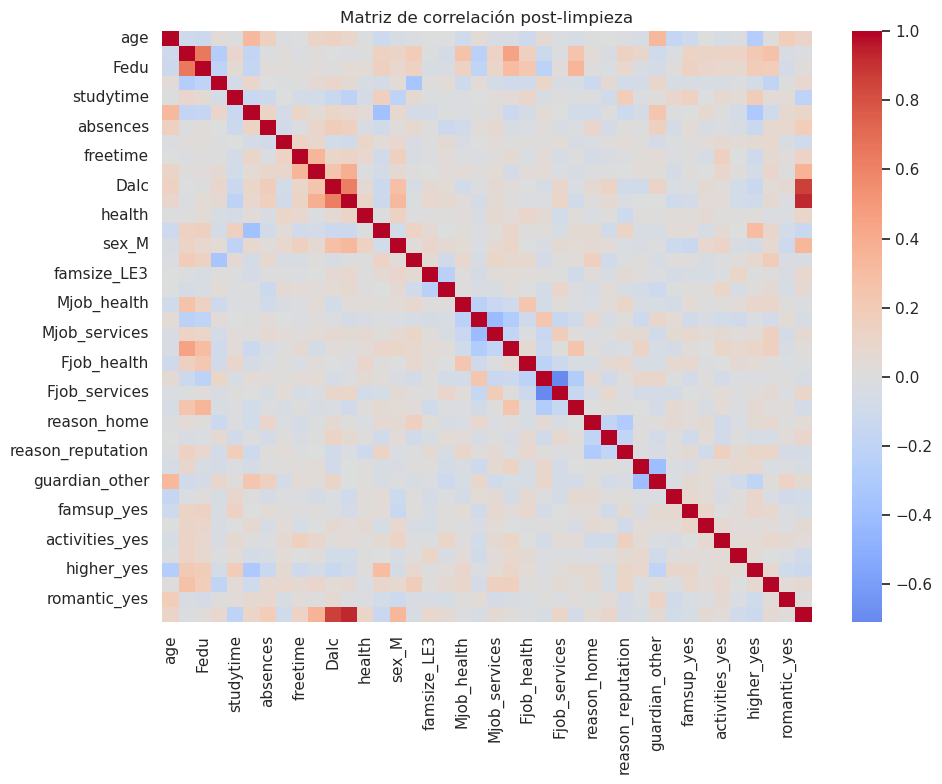

Correlación con la variable objetivo (target_pass):

target_pass          1.000000
higher_yes           0.309708
studytime            0.165111
Fedu                 0.146249
Medu                 0.144803
address_U            0.126663
reason_reputation    0.123914
Mjob_teacher         0.096404
internet_yes         0.088215
reason_home          0.060466
famsize_LE3          0.052215
Fjob_teacher         0.047490
activities_yes       0.047276
famrel               0.044987
famsup_yes           0.037903
schoolsup_yes        0.034527
Mjob_health          0.022766
Fjob_other           0.021943
Mjob_services        0.020504
Fjob_health          0.012556
Pstatus_T           -0.004241
nursery_yes         -0.007751
health              -0.009979
Mjob_other          -0.019592
guardian_mother     -0.045609
guardian_other      -0.047062
Fjob_services       -0.048640
paid_yes            -0.053708
traveltime          -0.057869
goout               -0.067241
sex_M               -0.078222
romantic_yes     

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación post-limpieza (df_enc incluye target_pass)
plt.figure(figsize=(10, 8))
sns.heatmap(df_enc.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Matriz de correlación post-limpieza")
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo target_pass
corr_target = df_enc.corr(numeric_only=True)["target_pass"].sort_values(ascending=False)
print("Correlación con la variable objetivo (target_pass):\n")
print(corr_target)


In [49]:
import numpy as np

# 1.1 Sin NA/Inf
has_na = X_df.isna().any().any()

# Tomamos solo columnas numéricas para el chequeo de infinitos
X_num = X_df.select_dtypes(include=["number"])
has_inf = np.isinf(X_num.values).any()

print(f"NA presentes: {has_na} | Inf presentes: {has_inf}")
assert not has_na and not has_inf, "Hay NA/Inf: revisa imputación/transformaciones."


NA presentes: False | Inf presentes: False


In [50]:
# Solo las columnas que escalaste (por convención: *_scaled)
scaled_cols = [c for c in X_df.columns if c.endswith("_scaled")]

if scaled_cols:
    stats_scaled = X_df[scaled_cols].agg(["mean", "std"]).T
    display(stats_scaled.round(3))

    # Aviso si hay desviaciones notorias del estándar
    off_mean = (stats_scaled["mean"].abs() > 0.15).sum()
    off_std  = ((stats_scaled["std"] - 1).abs() > 0.15).sum()
    print(f"Cols fuera de media≈0 (>0.15): {off_mean} | fuera de std≈1 (>0.15): {off_std}")
else:
    print("No se detectaron columnas *_scaled; omitiendo chequeo de escalado.")


,mean,std
age_scaled,-0.0,1.001
Medu_scaled,-0.0,1.001
Fedu_scaled,-0.0,1.001
traveltime_scaled,-0.0,1.001
studytime_scaled,0.0,1.001
failures_scaled,0.0,1.001
absences_scaled,0.0,1.001
famrel_scaled,-0.0,1.001
freetime_scaled,0.0,1.001
goout_scaled,0.0,1.001


Cols fuera de media≈0 (>0.15): 0 | fuera de std≈1 (>0.15): 0


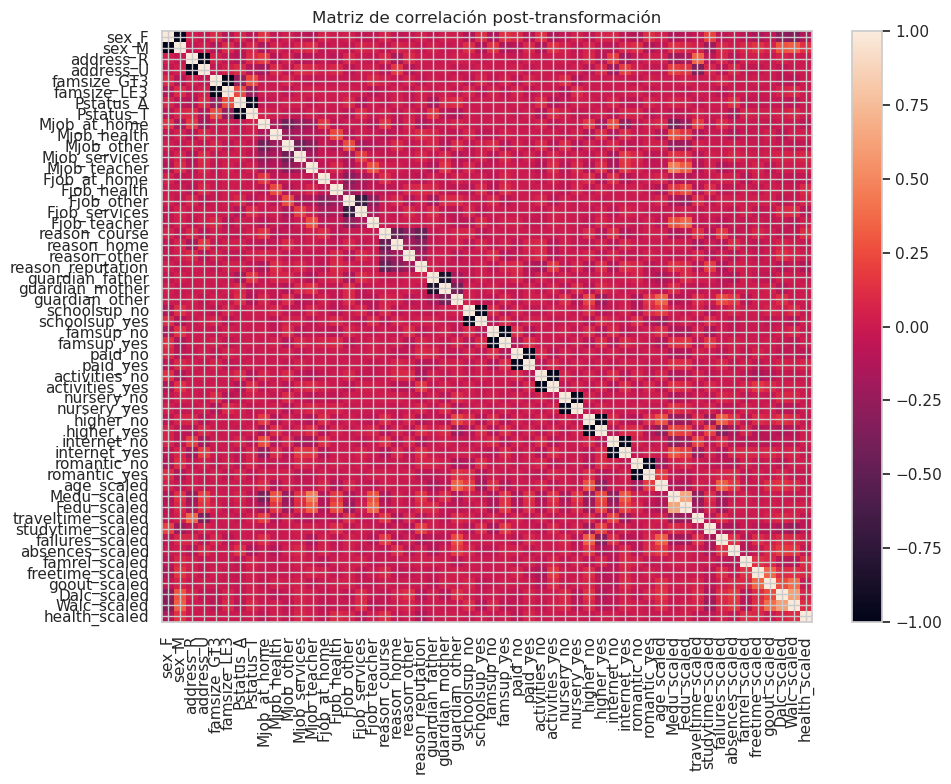

Pares con |r| ≥ 0.95: 12


internet_no    internet_yes     -1.0
activities_no  activities_yes   -1.0
famsup_no      famsup_yes       -1.0
schoolsup_no   schoolsup_yes    -1.0
Pstatus_A      Pstatus_T        -1.0
famsize_GT3    famsize_LE3      -1.0
sex_F          sex_M            -1.0
nursery_no     nursery_yes      -1.0
romantic_no    romantic_yes     -1.0
paid_no        paid_yes         -1.0
higher_no      higher_yes       -1.0
address_R      address_U        -1.0
Name: corr, dtype: float64

In [51]:
# Matriz de correlación de X_df (solo numéricas)
corr = X_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, interpolation="nearest", aspect="auto", vmin=-1, vmax=1)
plt.title("Matriz de correlación post-transformación")
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

# Detectar pares con |r| ≥ umbral (por ejemplo 0.95)
thr = 0.95
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
tri  = corr.where(mask)

high_pairs = (
    tri.stack()
       .rename("corr")
       .reindex(tri.stack().abs().sort_values(ascending=False).index)
)
high_pairs = high_pairs[high_pairs.abs() >= thr]

print(f"Pares con |r| ≥ {thr}: {len(high_pairs)}")
display(high_pairs.head(30))


## Fase 4. Modeling

En esta fase se construyó, entrenó y optimizó un modelo de clasificación para predecir el **desempeño académico** de un estudiante, definido como:

- **PASS = 1** (aprueba)
- **FAIL = 0** (no aprueba)

El modelo se entrenó siguiendo un pipeline reproducible que incluye preprocesamiento, balanceo de clases, selección de modelos y optimización de hiperparámetros.

---

## 4.1. Propósito del modelado

El objetivo del modelo es predecir si un estudiante tendrá un desempeño académico satisfactorio (PASS = 1) o un desempeño no satisfactorio (FAIL = 0).
El modelado se adapta al contexto del Colegio Unión (institución Adventista), por lo que:
- No se incluyen variables relacionadas con alcohol o conductas no permitidas.
- El modelo se enfoca solo en hábitos saludables, prácticas académicas, recursos educativos, contexto familiar y asistencia.
- El uso del modelo es preventivo y orientado a mejorar el acompañamiento educativo, NO para sanciones.


## 4.2. Selección de variables (versión institucional)
Estas variables sí pueden usarse, pues son académicas, demográficas o de recursos educativos:
- sex — Sexo del estudiante
- age — Edad
- address — Zona de residencia (Urbano/Rural)
- famsize — Tamaño del hogar
- Medu — Nivel educativo de la madre
- Fedu — Nivel educativo del padre
- studytime — Tiempo de estudio semanal
- failures — Veces que repitió cursos
- schoolsup — Apoyo académico del colegio
- famsup — Apoyo académico en casa
- paid — Clases de refuerzo
- activities — Actividades extracurriculares
- higher — Desea estudiar educación superior
- internet — Acceso a internet en casa
- famrel — Calidad general de relación familiar (no sensible)
- freetime — Tiempo libre después de clases
- health — Autoevaluación de salud física
- absences — Inasistencias totales

Estas variables son completamente aceptables y no vulneran valores institucionales.

❌ Variables EXCLUIDAS (no éticas o no relevantes para UPeU/Colegio Unión)
- Estas variables NO deben usarse en un colegio adventista:

❌ consumo de alcohol (prohibido institucionalmente)
- Dalc
- Walc

❌ vida sentimental (inapropiado en análisis escolar)
- romantic

❌ información familiar sensible
- Pstatus (relación de los padres)
- guardian (tutor legal)
- nursery (asistencia a guardería → irrelevante para secundaria)
- reason (motivo personal de elección del colegio)

❌ ocupación de los padres (puede introducir sesgos sociales)
- Mjob
- Fjob



## 4.3. Cargar datos y definir objetivo

In [3]:
# ============================================
# 1) Cargar datos y objetivo (PASS / FAIL)
# ============================================
import os, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Archivo ya limpio
DATA_FILE = "students_data_clean.csv"
TARGET     = "target_pass"   # 1 = PASS, 0 = FAIL

# Cargar dataset limpio
df = pd.read_csv(DATA_FILE)

# --------------------------------------------
# Eliminar variables NO aptas para colegio adventista
# --------------------------------------------
cols_to_drop = ["Dalc", "Walc", "goout"]  # alcohol + vida nocturna
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# --------------------------------------------
# Definir X e y
# --------------------------------------------
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

print("Variables utilizadas:", list(X.columns))
print("Proporción PASS:",  y.mean().round(3))
print("Proporción FAIL:", (1 - y.mean()).round(3))

df.head()

Variables utilizadas: ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'health']
Proporción PASS: 0.846
Proporción FAIL: 0.154


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,paid,activities,nursery,higher,internet,romantic,famrel,freetime,health,target_pass
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,yes,yes,no,no,4,3,3,1
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,no,no,yes,yes,no,5,3,3,1
2,F,15,U,LE3,T,1,1,at_home,other,other,...,no,no,yes,yes,yes,no,4,3,3,1
3,F,15,U,GT3,T,4,2,health,services,home,...,no,yes,yes,yes,yes,yes,3,2,5,1
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,yes,yes,no,no,4,3,5,1


In [39]:
# ============================================
# 2 Selección de variables (versión adventista)
# ============================================
selected_features = [
    "sex", "age", "address", "famsize",
    "Medu", "Fedu",
    "studytime", "failures", "absences",
    "schoolsup", "famsup", "paid", "activities",
    "higher", "internet",
    "famrel", "freetime", "health"
]

# Quedarse solamente con estas variables
df = df[selected_features + [TARGET]]

# Definir X e y
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

print("Variables finalmente utilizadas:", list(X.columns))
print("Proporción PASS:",  y.mean().round(3))
print("Proporción FAIL:", (1 - y.mean()).round(3))

Variables finalmente utilizadas: ['sex', 'age', 'address', 'famsize', 'Medu', 'Fedu', 'studytime', 'failures', 'absences', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'famrel', 'freetime', 'health']
Proporción PASS: 0.846
Proporción FAIL: 0.154


In [40]:
# ============================================
# 3) Split temprano (80/20)
# ============================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    stratify=y,             # mantiene proporción PASS/FAIL
    random_state=RANDOM_STATE
)

print(f"Train: {X_train.shape} | Test: {X_test.shape}")
print("Distribución en TRAIN:\n", y_train.value_counts(normalize=True).round(3))
print("\nDistribución en TEST:\n", y_test.value_counts(normalize=True).round(3))


Train: (519, 18) | Test: (130, 18)
Distribución en TRAIN:
 target_pass
1    0.846
0    0.154
Name: proportion, dtype: float64

Distribución en TEST:
 target_pass
1    0.846
0    0.154
Name: proportion, dtype: float64


In [41]:
# ============================================
# 4) Preprocesamiento (en pipeline)
# ============================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Identificar columnas categóricas y numéricas desde X_train
cat_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()

print("Categóricas:", cat_features)
print("Numéricas:", num_features)

# Preprocesador: escalado para numéricas y OHE para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    ]
)

# SMOTE para balanceo PASS (1) / FAIL (0)
smote = SMOTE(
    random_state=RANDOM_STATE,
    k_neighbors=3
)

def build_pipe(model):
    """
    Pipeline de entrenamiento:
    1) Preprocesamiento (prep)
    2) Oversampling SMOTE
    3) Modelo
    """
    return ImbPipeline([
        ("prep", preprocessor),
        ("smote", smote),
        ("model", model)
    ])


Categóricas: ['sex', 'address', 'famsize', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet']
Numéricas: ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences', 'famrel', 'freetime', 'health']


In [42]:
# =========================================
# 5) Modelos candidatos (sin XGB, LGB, CAT)
# =========================================
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Lista de modelos a evaluar como baseline
candidates = [
    ("LRN", LogisticRegression(
        max_iter=2000,
        random_state=RANDOM_STATE
    )),

    ("LDA", LinearDiscriminantAnalysis()),

    ("KNN", KNeighborsClassifier()),

    ("GNB", GaussianNB()),

    ("DTS", DecisionTreeClassifier(
        random_state=RANDOM_STATE
    )),

    ("RFS", RandomForestClassifier(
        n_estimators=300,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )),

    ("NNM", MLPClassifier(
        hidden_layer_sizes=(64,),
        max_iter=600,
        random_state=RANDOM_STATE
    )),
]

print("Modelos candidatos cargados correctamente.")

Modelos candidatos cargados correctamente.


In [43]:
# =========================================
# 6) Entrenar Baseline con CV (sin tuning)
# =========================================
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd

# Configuración de CV
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Métricas a evaluar
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "roc_auc": "roc_auc"
}

baseline_rows = []

print("\n===== Evaluación Baseline (sin tuning) =====\n")

# Ejecutar CV para cada modelo candidato
for name, model in candidates:
    pipe = build_pipe(model)

    scores = cross_validate(
        estimator=pipe,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    baseline_rows.append({
        "model": name,
        "acc_mean": scores["test_accuracy"].mean(),
        "acc_std":  scores["test_accuracy"].std(),
        "f1_mean":  scores["test_f1_macro"].mean(),
        "f1_std":   scores["test_f1_macro"].std(),
        "auc_mean": scores["test_roc_auc"].mean(),
    })

    print(f"{name:>4} | "
          f"ACC {scores['test_accuracy'].mean():.3f} | "
          f"F1 {scores['test_f1_macro'].mean():.3f} | "
          f"AUC {scores['test_roc_auc'].mean():.3f}")

# Tabla ordenada por mejor F1-macro
baseline_df = pd.DataFrame(baseline_rows).sort_values(
    "f1_mean",
    ascending=False
)

print("\n===== Resultados ordenados por F1_macro =====")
display(baseline_df)

# Selección del mejor modelo baseline
baseline_best_name  = baseline_df.iloc[0]["model"]
baseline_best_model = dict(candidates)[baseline_best_name]

print(f"\n>>> Baseline ganador: {baseline_best_name}")



===== Evaluación Baseline (sin tuning) =====

 LRN | ACC 0.811 | F1 0.698 | AUC 0.776
 LDA | ACC 0.796 | F1 0.674 | AUC 0.762
 KNN | ACC 0.719 | F1 0.600 | AUC 0.686
 GNB | ACC 0.788 | F1 0.682 | AUC 0.802
 DTS | ACC 0.807 | F1 0.632 | AUC 0.636
 RFS | ACC 0.848 | F1 0.654 | AUC 0.838
 NNM | ACC 0.834 | F1 0.641 | AUC 0.739

===== Resultados ordenados por F1_macro =====


,model,acc_mean,acc_std,f1_mean,f1_std,auc_mean
0,LRN,0.811146,0.029103,0.697973,0.054705,0.775846
3,GNB,0.788051,0.047504,0.681941,0.051182,0.802199
1,LDA,0.795706,0.040373,0.673762,0.077446,0.761582
5,RFS,0.847797,0.013990,0.654278,0.046615,0.837527
6,NNM,0.834354,0.020144,0.640547,0.055911,0.738896
4,DTS,0.807300,0.022112,0.632092,0.043226,0.635678
2,KNN,0.718745,0.045759,0.599864,0.049779,0.686298



>>> Baseline ganador: LRN


In [44]:
# =========================================
# 7) Tuning con CV y elección del ganador
#     (solo LRN, RFS y NNM)
# =========================================
import tempfile, shutil
import warnings
import numpy as np
import pandas as pd

from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform
try:
    from scipy.stats import loguniform
except Exception:
    from sklearn.utils.fixes import loguniform  # fallback

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Ignorar ConvergenceWarning globalmente (por si acaso)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# CV "ligera" para tuning
cv_light = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Espacios de búsqueda por modelo
param_spaces = {
    "LRN": {
        "model__C": loguniform(1e-2, 1e1),
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs", "liblinear"],
        "model__class_weight": [None, "balanced"],
    },
    "RFS": {
        "model__n_estimators": randint(200, 500),
        "model__max_depth": randint(4, 14),
        "model__min_samples_split": randint(2, 16),
        "model__min_samples_leaf": randint(1, 8),
        "model__max_features": ["sqrt", "log2", None],
        "model__bootstrap": [True, False],
    },
    "NNM": {
        # Red más pequeña (más fácil de converger)
        "model__hidden_layer_sizes": [(16,), (32,), (32, 16)],
        # Regularización L2 moderada
        "model__alpha": loguniform(1e-5, 1e-3),
        # LR más pequeña para estabilidad
        "model__learning_rate_init": loguniform(1e-4, 5e-3),
        "model__activation": ["relu"],
        "model__solver": ["adam"],
        # Early stopping para converger antes de llegar a max_iter
        "model__early_stopping": [True],
        "model__n_iter_no_change": [15, 20],
    },
}

# Solo estos modelos se tunearán
to_tune = [
    ("LRN", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)),
    ("RFS", RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)),
    ("NNM", MLPClassifier(max_iter=1000, random_state=RANDOM_STATE)),
]

refit_metric = "f1_macro"
scoring_opt = {
    "f1_macro": "f1_macro",
    "roc_auc": "roc_auc",
    "accuracy": "accuracy"
}

best_models = []
cache_dir = tempfile.mkdtemp(prefix="skcache_")

try:
    for name, base_model in to_tune:
        print(f"\n🔍 Tuning del modelo: {name}")
        pipe = build_pipe(base_model)

        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=param_spaces[name],
            n_iter=15,
            cv=cv_light,
            scoring=scoring_opt,
            refit=refit_metric,
            n_jobs=-1,
            random_state=RANDOM_STATE,
            verbose=1,
            return_train_score=False,
            error_score=np.nan,
        )

        # Para NNM, silenciamos explícitamente los ConvergenceWarning
        if name == "NNM":
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=ConvergenceWarning)
                search.fit(X_train, y_train)
        else:
            search.fit(X_train, y_train)

        best_models.append(
            (name, search.best_estimator_, search.best_score_, search.best_params_)
        )

    # Ordenar por mejor F1 de CV
    best_models.sort(
        key=lambda x: (x[2] if pd.notna(x[2]) else -1),
        reverse=True
    )

    best_name, final_pipe_opt, best_cv_f1, best_params = best_models[0]
    print(f"\n>>> GANADOR OPTIMIZADO: {best_name} (F1 CV={best_cv_f1:.4f})")
    print("Mejores hiperparámetros encontrados:")
    print(best_params)

finally:
    shutil.rmtree(cache_dir, ignore_errors=True)


🔍 Tuning del modelo: LRN
Fitting 5 folds for each of 15 candidates, totalling 75 fits

🔍 Tuning del modelo: RFS
Fitting 5 folds for each of 15 candidates, totalling 75 fits

🔍 Tuning del modelo: NNM
Fitting 5 folds for each of 15 candidates, totalling 75 fits

>>> GANADOR OPTIMIZADO: RFS (F1 CV=0.7156)
Mejores hiperparámetros encontrados:
{'model__bootstrap': True, 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 12, 'model__n_estimators': 271}


## Fase 5. Evaluation

In [45]:
# =========================================
# 8) Comparación justa (solo CV) - baseline vs ganador tuning
# =========================================
from sklearn.model_selection import StratifiedKFold, cross_validate

# Usamos EXACTAMENTE el mismo esquema de CV para comparar (fair comparison)
same_cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=123
)

# Pipeline del mejor modelo baseline (de la etapa 6)
pipe_baseline_best = build_pipe(baseline_best_model)

# Pipeline del mejor modelo tunado (de la etapa 7)
pipe_tuned_best = final_pipe_opt

def cv_summary(pipe, name):
    """Imprime y devuelve el F1-macro promedio en CV para un pipeline dado."""
    scores = cross_validate(
        estimator=pipe,
        X=X_train,
        y=y_train,
        cv=same_cv,
        scoring={
            "f1_macro": "f1_macro",
            "roc_auc": "roc_auc",
            "accuracy": "accuracy"
        },
        n_jobs=-1
    )

    print(
        f"{name}: "
        f"F1 {scores['test_f1_macro'].mean():.4f} ± {scores['test_f1_macro'].std():.4f} | "
        f"AUC {scores['test_roc_auc'].mean():.4f} | "
        f"ACC {scores['test_accuracy'].mean():.4f}"
    )

    return scores["test_f1_macro"].mean()

print("\n===== Comparación Baseline vs Tuned (CV idéntica) =====\n")

# F1 promedio de ambos modelos (en la misma CV)
f1_base = cv_summary(pipe_baseline_best, f"Baseline ({baseline_best_name})")
f1_tune = cv_summary(pipe_tuned_best,   f"Tuned ({best_name})")

# Regla de selección:
# - Si tuned mejora F1 en al menos 0.005, se elige tuned
# - Si la mejora es menor, se elige baseline por simplicidad
if (f1_tune - f1_base) >= 0.005:
    winner_name = best_name
    winner_pipe = pipe_tuned_best
else:
    winner_name = baseline_best_name
    winner_pipe = pipe_baseline_best

print(f"\n>>> Modelo seleccionado para TEST: {winner_name}")



===== Comparación Baseline vs Tuned (CV idéntica) =====

Baseline (LRN): F1 0.7131 ± 0.0470 | AUC 0.7873 | ACC 0.8189
Tuned (RFS): F1 0.7357 ± 0.0421 | AUC 0.8449 | ACC 0.8594

>>> Modelo seleccionado para TEST: RFS


In [46]:
# =========================================
# 8) Política de decisión (mínima)
# =========================================
# Por ahora usamos el umbral clásico 0.50:
# p(PASS) >= 0.50  → predicción = PASS (1)
# p(PASS) <  0.50  → predicción = FAIL (0)

BEST_THR = 0.50
print(f"Umbral de decisión (provisorio): {BEST_THR}")


Umbral de decisión (provisorio): 0.5


In [47]:
# =========================================
# 9) Evaluación final en TEST
# =========================================
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    average_precision_score
)

# Asegurar que el modelo seleccionado está entrenado
winner_pipe.fit(X_train, y_train)

# Probabilidad de PASS=1 en el conjunto TEST
proba_test = winner_pipe.predict_proba(X_test)[:, 1]

# Predicción según el umbral definido
y_pred = (proba_test >= BEST_THR).astype(int)

print("\n== Reporte final en TEST ==")
print(classification_report(y_test, y_pred, digits=4))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC:", roc_auc_score(y_test, proba_test))
print("PR-AUC :", average_precision_score(y_test, proba_test))



== Reporte final en TEST ==
              precision    recall  f1-score   support

           0     0.3043    0.3500    0.3256        20
           1     0.8785    0.8545    0.8664       110

    accuracy                         0.7769       130
   macro avg     0.5914    0.6023    0.5960       130
weighted avg     0.7902    0.7769    0.7832       130


Matriz de confusión:
[[ 7 13]
 [16 94]]

ROC-AUC: 0.665
PR-AUC : 0.9103833641974735


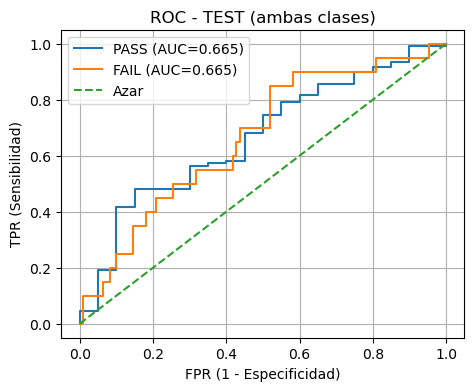

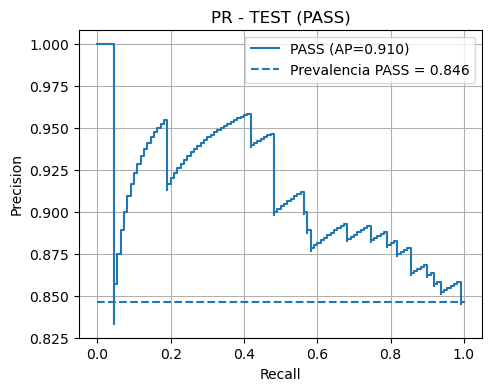

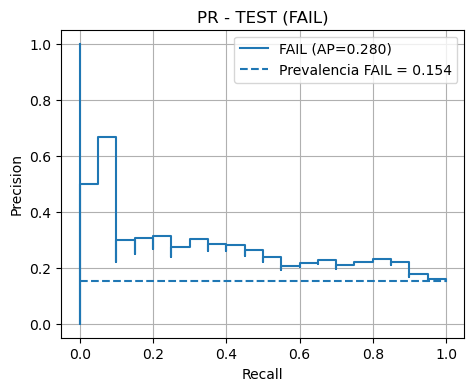

In [48]:
# === Curvas ROC y PR para ambas clases (PASS=1 y FAIL=0) ===
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Probabilidades por clase (salida de winner_pipe)
proba = winner_pipe.predict_proba(X_test)
proba_pass = proba[:, 1]  # P(PASS=1 | x)
proba_fail = proba[:, 0]  # P(FAIL=0 | x)

y_true = np.asarray(y_test)

# -------- ROC --------
# Clase 1 (PASS)
fpr1, tpr1, _ = roc_curve(y_true, proba_pass)
roc_auc1 = auc(fpr1, tpr1)

# Clase 0 (FAIL): la tratamos como "positiva" para su propia curva
y_true0 = 1 - y_true
fpr0, tpr0, _ = roc_curve(y_true0, proba_fail)
roc_auc0 = auc(fpr0, tpr0)

plt.figure(figsize=(5.2, 4))
plt.plot(fpr1, tpr1, label=f"PASS (AUC={roc_auc1:.3f})")
plt.plot(fpr0, tpr0, label=f"FAIL (AUC={roc_auc0:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Azar")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.title("ROC - TEST (ambas clases)")
plt.legend()
plt.grid(True)
plt.show()

# -------- PR (Precision-Recall) --------
# Clase 1 (PASS)
prec1, rec1, _ = precision_recall_curve(y_true, proba_pass)
ap1 = average_precision_score(y_true, proba_pass)
prev1 = y_true.mean()  # prevalencia de clase 1 (PASS)

plt.figure(figsize=(5.2, 4))
plt.step(rec1, prec1, where="post", label=f"PASS (AP={ap1:.3f})")
plt.hlines(prev1, 0, 1, linestyles="--", label=f"Prevalencia PASS = {prev1:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR - TEST (PASS)")
plt.legend()
plt.grid(True)
plt.show()

# Clase 0 (FAIL) como positiva
prec0, rec0, _ = precision_recall_curve(y_true0, proba_fail)
ap0 = average_precision_score(y_true0, proba_fail)
prev0 = y_true0.mean()  # = 1 - prev1

plt.figure(figsize=(5.2, 4))
plt.step(rec0, prec0, where="post", label=f"FAIL (AP={ap0:.3f})")
plt.hlines(prev0, 0, 1, linestyles="--", label=f"Prevalencia FAIL = {prev0:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR - TEST (FAIL)")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# =========================================
# 11) Exportar artefactos (mínimo)
# =========================================
import os
import json
import platform
import joblib
import sklearn

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
)

# IMPORTANTE:
# - Se asume que ya existen en memoria:
#   - winner_name, winner_pipe  (modelo final seleccionado)
#   - X, y                      (dataset completo)
#   - X_test, y_test, proba_test (probabilidades del modelo en TEST)
#   - DATA_FILE, TARGET, RANDOM_STATE, BEST_THR

version_id = "v1"  # o datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
ART_DIR = os.path.join("artefactos", version_id)
os.makedirs(ART_DIR, exist_ok=True)

print("Guardando artefactos en:", ART_DIR)

# --------------------------
# Guardar pipeline final
# --------------------------
pipe_path = os.path.join(ART_DIR, f"pipeline_{winner_name}.joblib")
joblib.dump(winner_pipe, pipe_path)
print(f"Pipeline guardado en: {pipe_path}")

# --------------------------
# Guardar esquema de columnas
# --------------------------
schema = {c: str(X[c].dtype) for c in X.columns}
with open(os.path.join(ART_DIR, "input_schema.json"), "w", encoding="utf-8") as f:
    json.dump(schema, f, ensure_ascii=False, indent=2)

# --------------------------
# Guardar mapa de etiquetas PASS / FAIL
# --------------------------
label_map = {"FAIL": 0, "PASS": 1}
with open(os.path.join(ART_DIR, "label_map.json"), "w", encoding="utf-8") as f:
    json.dump(label_map, f, ensure_ascii=False, indent=2)

# --------------------------
# Métricas con el umbral actual
# --------------------------
def pack_metrics(y_true, proba, thr):
    yp = (proba >= thr).astype(int)
    return {
        "f1": float(f1_score(y_true, yp)),
        "precision": float(precision_score(y_true, yp, zero_division=0)),
        "recall": float(recall_score(y_true, yp)),
        "roc_auc": float(roc_auc_score(y_true, proba)),
        "pr_auc": float(average_precision_score(y_true, proba)),
        "confusion_matrix": confusion_matrix(y_true, yp).tolist(),
    }

decision = {
    "winner": winner_name,
    "threshold": float(BEST_THR),
    # usa proba_test ya calculada en la fase de evaluación
    "test_metrics": pack_metrics(y_test, proba_test, BEST_THR),
}

with open(os.path.join(ART_DIR, "decision_policy.json"), "w", encoding="utf-8") as f:
    json.dump(decision, f, ensure_ascii=False, indent=2)

# --------------------------
# Model Card mínima
# --------------------------
model_card_md = f"""# Model Card — {winner_name}
**Versión:** {version_id}  
**Sistema:** Python {platform.python_version()}, scikit-learn {sklearn.__version__}

## Datos
Archivo: `{DATA_FILE}`  
Shape del feature set: {X.shape}  
Objetivo: `{TARGET}` (FAIL=0, PASS=1)  
Prevalencia PASS = {y.mean():.3f}

## Entrenamiento
Split 80/20 estratificado (random_state={RANDOM_STATE}).  
Preprocesamiento: StandardScaler (num) + OneHotEncoder(ignore) (cat) + SMOTE(k=3).

## Modelo final seleccionado
**{winner_name}**  

Umbral de decisión usado: **{BEST_THR:.2f}**

## Métricas en TEST
F1 = {decision['test_metrics']['f1']:.3f}  
Precisión = {decision['test_metrics']['precision']:.3f}  
Recall = {decision['test_metrics']['recall']:.3f}  
ROC-AUC = {decision['test_metrics']['roc_auc']:.3f}  
PR-AUC = {decision['test_metrics']['pr_auc']:.3f}
"""

with open(os.path.join(ART_DIR, "model_card.md"), "w", encoding="utf-8") as f:
    f.write(model_card_md)

# --------------------------
# Guardar ejemplos de entrada
# --------------------------
with open(os.path.join(ART_DIR, "sample_inputs.json"), "w", encoding="utf-8") as f:
    json.dump(
        X_test.iloc[:5].to_dict(orient="records"),
        f,
        ensure_ascii=False,
        indent=2
    )

print(f"Artefactos guardados en: {ART_DIR}")

Guardando artefactos en: artefactos/v1
Pipeline guardado en: artefactos/v1/pipeline_RFS.joblib
Artefactos guardados en: artefactos/v1


In [50]:
# Tomamos el esquema que ya construimos (de input_schema.json)
INPUT_SCHEMA = schema

# Payload de ejemplo con valores por defecto
# (0 para numéricas, "" para categóricas)
payload_one = {
    k: (0 if str(t).startswith(("int", "float")) else "")
    for k, t in INPUT_SCHEMA.items()
}
payload_one


{'sex': '',
 'age': 0,
 'address': '',
 'famsize': '',
 'Medu': 0,
 'Fedu': 0,
 'studytime': 0,
 'failures': 0,
 'absences': 0,
 'schoolsup': '',
 'famsup': '',
 'paid': '',
 'activities': '',
 'higher': '',
 'internet': '',
 'famrel': 0,
 'freetime': 0,
 'health': 0}

In [51]:
# =========================================
# Funciones de inferencia: predict_one y predict_batch
#    Tema: PASS (1) vs FAIL (0)
# =========================================
import pandas as pd

# 0 = FAIL, 1 = PASS  (coherente con target_pass)
LABELS = {0: "FAIL", 1: "PASS"}

def _ensure_columns(df_input: pd.DataFrame, X_ref: pd.DataFrame) -> pd.DataFrame:
    """
    Asegura que df_input tenga:
      - Todas las columnas de X_ref
      - En el mismo orden
    Las columnas que falten se rellenan:
      - Numéricas -> 0
      - Categóricas -> "" (cadena vacía)
    """
    df = df_input.copy()

    for col in X_ref.columns:
        if col not in df.columns:
            # numéricas -> 0, categóricas -> ""
            if str(X_ref[col].dtype).startswith(("int", "float")):
                df[col] = 0
            else:
                df[col] = ""

    # Reordenar exactamente como en X_ref
    df = df[X_ref.columns]

    return df


def predict_one(sample_dict: dict) -> dict:
    """
    Predice PASS/FAIL para un solo estudiante.
    sample_dict: {"school": ..., "sex": ..., "age": ..., ...}
    """
    # DataFrame con un solo registro
    df_raw = pd.DataFrame([sample_dict])

    # Asegurar columnas y orden según X (dataset de entrenamiento)
    df = _ensure_columns(df_raw, X)

    # Probabilidad de PASS (clase 1)
    proba = float(winner_pipe.predict_proba(df)[:, 1][0])

    # Aplicar umbral
    pred_int = int(proba >= BEST_THR)   # 1 = PASS, 0 = FAIL
    pred_label = LABELS[pred_int]

    return {
        "proba": proba,          # P(PASS | x)
        "pred_int": pred_int,    # 1 = PASS, 0 = FAIL
        "pred_label": pred_label,
        "threshold": float(BEST_THR),
    }


def predict_batch(list_of_dicts: list) -> list:
    """
    Predice PASS/FAIL para una lista de estudiantes (lista de dicts).
    Devuelve una lista de resultados (uno por estudiante).
    """
    df_raw = pd.DataFrame(list_of_dicts)

    # Asegurar columnas y orden según X
    df = _ensure_columns(df_raw, X)

    # Probabilidades de PASS
    proba = winner_pipe.predict_proba(df)[:, 1]
    preds_int = (proba >= BEST_THR).astype(int)

    results = []
    for p, z in zip(proba, preds_int):
        results.append({
            "proba": float(p),
            "pred_int": int(z),
            "pred_label": LABELS[int(z)],
            "threshold": float(BEST_THR),
        })

    return results

In [52]:
samples_json = """
[
  {
    "sex": "F",
    "age": 16,
    "address": "U",
    "famsize": "GT3",
    "Medu": 3,
    "Fedu": 2,
    "studytime": 3,
    "failures": 0,
    "absences": 2,
    "schoolsup": "no",
    "famsup": "yes",
    "paid": "no",
    "activities": "yes",
    "higher": "yes",
    "internet": "yes",
    "famrel": 4,
    "freetime": 3,
    "health": 4
  },
  {
    "sex": "M",
    "age": 18,
    "address": "R",
    "famsize": "LE3",
    "Medu": 1,
    "Fedu": 1,
    "studytime": 1,
    "failures": 3,
    "absences": 10,
    "schoolsup": "yes",
    "famsup": "no",
    "paid": "no",
    "activities": "no",
    "higher": "yes",
    "internet": "no",
    "famrel": 3,
    "freetime": 4,
    "health": 3
  }
]
""".strip()

import json

samples_from_json = json.loads(samples_json)

# Asumiendo que ya tienes definida la función predict_batch y el modelo winner_pipe
res = predict_batch(samples_from_json)
res


[{'proba': 0.9720004777154386,
  'pred_int': 1,
  'pred_label': 'PASS',
  'threshold': 0.5},
 {'proba': 0.547112321644286,
  'pred_int': 1,
  'pred_label': 'PASS',
  'threshold': 0.5}]

In [53]:
import joblib
joblib.dump(winner_pipe, "modelo_atrasos.joblib")  # mismo nombre que el del profe

['modelo_atrasos.joblib']

## Fase 6. Despliegue


- 📁 Repositorio GitHub:  
  [https://github.com/AlvaroXD12/demost](https://github.com/AlvaroXD12/demost)

- 🌐 Aplicación Streamlit:  
  [https://demost-3zywnffa7vwygvupeymoyo.streamlit.app/](https://demost-3zywnffa7vwygvupeymoyo.streamlit.app/)
